# Preprocessing NN-HH results

## Libraries


In [44]:
# Load data
import tools as tl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import benchmark_func as bf
from mpmath import *
from decimal import Decimal
import scipy.stats as st


## General settings

In [45]:
sns.set(context="paper", font_scale=1.8, palette="husl", style="ticks",
        rc={'font.family': 'serif', 'font.size': 15,
            "xtick.major.top": False, "ytick.major.right": False})

is_saving = True
show_plots = True
saving_format = 'png'

plt.rcParams.update({'figure.max_open_warning': 0})
plt.close('all') 

# Saving images flag
folder_name = 'data_files/results_nn_hh_article/'
if is_saving:
    # Read (of create if so) a folder for storing images
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)

## Experiment batch setting

### Experiment batch names

In [46]:
# List of combinations listed in the manuscript

# MLP vs bMHs and RS MHs
batch_1 = ['MLP_very_small', 'unfolded_hhs_pop30']

# MLP variants
batch_2 = ['MLP_very_small', 'MLP_small', 'MLP_decreasing_dyn', 'MLP_increasing_dyn_new', 'MLP_deeper_dyn']
batch_2 = ['MLP_very_small', 'MLP_very_small_less_epochs', 'MLP_small', 'MLP_decreasing_dyn', 'MLP_increasing_dyn_new', 'MLP_deeper_dyn', 'LSTM_small']

# MLP vs LSTM
batch_3 = ['MLP_deep', 'MLP_very_small', 'LSTM_small']

# LSTM Memory length
batch_4 = ['LSTM_vl']
for i in range(1, 11):
    batch_4.append(f'LSTM_{i}0_cut')

# LSTM unlimited
batch_5 = ['LSTM_60_limited', 'LSTM_60_unlimited']

# LSTM 1 hidden layer
batch_6 = ['LSTM_sig10', 'LSTM_sig20', 'LSTM_sig30', 'LSTM_sig40']

# LSTM activation
batch_7 = ['LSTM_sigmoid', 'LSTM_tanh']

# LSTM hidden layers variants
batch_8 = ['LSTM_best_memory', 'LSTM_twoHL', 'LSTM_threeHL', 'LSTM_double', 'LSTM_tanh_sandwich'] # +Best

# Static vs LSTM
batch_new = ['LSTM_small', 'MLP_very_small',  'TF_Static_30_exp1']

# Transformers
batch_tf = ['LSTM_sigmoid', 'LSTM_tanh', 'unfolded_hhs_pop30', 'TF_distilbert', 'TF_distilbert_qrt']

# Training sample tests
batch_special = ['LSTM_sigmoid', 'LSTM_sigmoid_2', 'LSTM_sigmoid_3', 'LSTM_tanh', 'LSTM_tanh_2']

### Experiment constants

In [47]:
# Indicates which experiments
results_file_name = 'batch_2'
consider_experiments = eval(results_file_name)

restrict_problems = False
for experiment in consider_experiments:
    if 'TF_' in experiment:
        restrict_problems = True

### Experiments info

In [48]:
collection_experiments = dict({
    'MLP_very_small': {
        'filename': 'default_nn_mlp_30pop_verysmall_100',
        'ID': 'MLP\_very\_small',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 100,
        'ylim': [0, 0.3],
        'has_performance': True,
        'hiddenL': [20],
        'epochs': 100
    },
    'MLP_very_small_less_epochs': {
        'filename': 'default_nn_mlp_very_small_less_epochs',
        'ID': 'MLP\_very\_small\_less\_epochs',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 100,
        'ylim': [0, 0.3],
        'has_performance': True,
        'hiddenL': [20],
        'epochs': 15
    },
    'TF_Static_30_exp1': {
        'filename': 'exp_output/transfer_learning_static_pop30_exp1',
        'ID': 'Static\_pop30\_exp1',
        'pop': 30,
        'collection': 'default.txt',
        'ylim': [0, 0.3],
        'is_unfolded': True,
        'has_performance': True
    },
    'MLP_small': {
        'filename': 'default_nn_mlp_normal_dynamic',
        'ID': 'MLP\_small',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 100,
        'ylim': [0, 0.30],
        'has_performance': True,
        'hiddenL': [60],
        'epochs': 100
    },
    'MLP_decreasing_dyn': {
        'filename': 'default_nn_mlp_decreasing_dynamic',
        'ID': 'MLP\_decreasing',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 100,
        'ylim': [0, 0.23],
        'has_performance': True
    },
    'MLP_increasing_dyn': {
        'filename': 'default_nn_mlp_increasing_dynamic',
        'ID': 'MLP\_increasing\_dynamic',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 100,
        'ylim': [0, 0.30],
        'has_performance': True
    },
    'MLP_increasing_dyn_new': {
        'filename': 'default_nn_mlp_increasing_dynamic_new',
        'ID': 'MLP\_increasing',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 100,
        'ylim': [0, 0.30],
        'has_performance': True
    },
    'MLP_deep': {
        'filename': 'default_mlp_30pop_deep',
        'ID': 'MLP\_deep\_random',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 100,
        'ylim': [0, 0.23],
        'has_performance': True
    },
    'MLP_deep_dyn': {
        'filename': 'default_nn_mlp_deep_dynamic',
        'ID': 'MLP\_deep\_dyn',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 100,
        'ylim': [0, 0.3],
        'has_performance': True
    },
    'MLP_deeper_dyn': {
        'filename': 'default_nn_mlp_deeper_dynamic',
        'ID': 'MLP\_deep',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 100,
        'ylim': [0, 0.3],
        'has_performance': True
    },
    'LSTM_vl': {
        'filename': 'default_lstm_30pop',
        'ID': 'LSTM\_vl',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 100,
        'ylim': [0, 0.22],
        'has_performance': True
    },
    'LSTM_60_unlimited': {
        'filename': 'default_nn_lstm_unlimited_60',
        'ID': 'LSTM\_limit400',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 60,
        'ylim': [0, 0.30],
        'has_performance': True
    },
    'LSTM_tanh': {
        'filename': 'default_nn_lstm_tanh_60',
        'ID': 'LSTM\_tanh',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 60,
        'ylim': [0, 0.30],
        'has_performance': True
    },
    'LSTM_twoHL': {
        'filename': 'default_nn_lstm_sigmoid_2hidden_60',
        'ID': 'LSTM\_two\_hidden\_layers',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 60,
        'ylim': [0, 0.30],
        'has_performance': True
    },
    'LSTM_threeHL': {
        'filename': 'default_nn_lstm_sigmoid_3hidden_60',
        'ID': 'LSTM\_three\_hidden\_layers',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 60,
        'ylim': [0, 0.30],
        'has_performance': True
    },
    'LSTM_double': {
        'filename': 'default_nn_lstm_sigmoid_2hiddenLSTM_60',
        'ID': 'LSTM\_double\_sigmoid',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 60,
        'ylim': [0, 0.30],
        'has_performance': True
    },
    'LSTM_tanh_sandwich': {
        'filename': 'default_nn_lstm_tanh_3hidden_sandwich2_60',
        'ID': 'LSTM\_tanh\_sandwich',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 60,
        'ylim': [0, 0.30],
        'has_performance': True
    },
    'TF_distilbert': {
        'filename': 'transformer_distilbert',
        'ID': 'TF\_distilbert',
        'pop': 30,
        'collection': 'default.txt',
        'ylim': [0, 0.30],
        'has_performance': True
    },
    'TF_distilbert_qrt': {
        'filename': 'exp_output/transformer_distilbert_quartile',
        'ID': 'TF\_distilbert\_quartile',
        'pop': 30,
        'collection': 'default.txt',
        'ylim': [0, 0.30],
        'has_performance': True
    },
    'unfolded_hhs_pop30': {
        'filename': 'unfolded_hhs_pop30',
        'ID': 'unfolded\_mh\_pop30',
        'pop': 30,
        'collection': 'default.txt',
        'ylim': [0, 0.15], 
        'is_unfolded': True,
        'has_performance': True,
    },
})

for i in range(10, 41, 10):
    collection_experiments[f'LSTM_sig{i}'] = dict({
        'filename': f'default_nn_lstm_sigmoid{i}_60',
        'ID': f'LSTM\_sigmoid{i}',
        'pop': 30,
        'collection': 'default.txt',
        'mem': 60,
        'ylim': [0, 0.3],
        'has_performance': True
    })

for i in range(10, 101, 10):
    collection_experiments[f'LSTM_{i}_cut'] = dict({
        'filename': 'default_nn_lstm_cut_pad_'+str(i),
        'ID': 'LSTM\_'+str(i),
        'pop': 30,
        'collection': 'default.txt',
        'mem': i,
        'ylim': [0, 0.3],
        'has_performance': True
    })
synonyms = dict({
    'LSTM_100_cut': [('LSTM_small', 'LSTM\_small')],
    'LSTM_60_cut':  [('LSTM_60_limited', 'LSTM\_limit100'),
                     ('LSTM_sigmoid', 'LSTM\_sigmoid'), ('LSTM_sig20', 'LSTM\_sigmoid20'),
                     ('LSTM_best_memory', 'LSTM\_bestmemory'), ('LSTM_sigmoid_2', 'LSTM\_sigmoid\_random'),
                     ('LSTM_sigmoid_3', 'LSTM\_sigmoid\_random2')],
    'LSTM_tanh': [('LSTM_tanh_2', 'LSTM\_tanh\_random')],
    'LSTM_best_hiddenlayer': []
})
for original, copies in synonyms.items():
    for copy, new_id in copies:
        collection_experiments[copy] = collection_experiments[original].copy()
        collection_experiments[copy]['ID'] = new_id

collection_experiments['LSTM_sigmoid_2']['filename'] = 'default_nn_lstm_sigmoid_60_random'
collection_experiments['LSTM_sigmoid_3']['filename'] = 'default_nn_lstm_sigmoid_60_random2_0'
collection_experiments['LSTM_tanh_2']['filename'] = 'default_nn_lstm_tanh_60_random'



# Read results
data_files = dict({experiment: collection_experiments[experiment] for experiment in consider_experiments})


## Experiment details settings

### Collection settings

In [49]:
# Read operators and find their alias
collections = ['default.txt', 'basicmetaheuristics.txt'] #'short_collection.txt', 'medium_collection.txt',

encoded_heuristic_space = dict()
for collection_file in collections:
    with open('./collections/' + collection_file, 'r') as operators_file:
        encoded_heuristic_space[collection_file] = [eval(line.rstrip('\n')) for line in operators_file]

# Search operator aliases
perturbator_alias = {
    'random_search': 'RS',
    'central_force_dynamic': 'CF',
    'differential_mutation': 'DM',
    'firefly_dynamic': 'FD',
    'genetic_crossover': 'GC',
    'genetic_mutation': 'GM',
    'gravitational_search': 'GS',
    'random_flight': 'RF',
    'local_random_walk': 'RW',
    'random_sample': 'RX',
    'spiral_dynamic': 'SD',
    'swarm_dynamic': 'PS'}

selector_alias = {'greedy': 'g', 'all': 'd', 'metropolis': 'm', 'probabilistic': 'p'}

operator_families = {y: i for i, y in enumerate(sorted([x for x in perturbator_alias.values()]))}

# Pre-build the alias list
heuristic_space = dict()
for collection_file in collections:
    if all(isinstance(x, tuple) for x in encoded_heuristic_space[collection_file]):
        heuristic_space[collection_file] = [perturbator_alias[x[0]] + selector_alias[x[2]]
                                            for x in encoded_heuristic_space[collection_file]]

# Find repeated elements
for collection_file in collections:
    if collection_file in heuristic_space:
        for heuristic in heuristic_space[collection_file]:
            concurrences = tl.listfind(heuristic_space[collection_file], heuristic)
            if len(concurrences) > 1:
                for count, idx in enumerate(concurrences):
                    heuristic_space[collection_file][idx] += f'{count + 1}'



### Auxiliar functions for experiment processing

Download the experiments result from https://drive.google.com/drive/folders/1lGhh2fLYH2U4rvoaRDwHxRlaEUI4CZDB?usp=sharing


In [50]:
# Number of dimensions
dimensions = [2, 10, 30, 50]
num_dime = len(dimensions)

def sort_dict(dataset):
    problems = dataset['problem']
    dimensions = dataset['dimensions']
    results = dataset['results']
    list_pair_prob_dim = list(zip(problems, dimensions, results))
    list_pair_prob_dim.sort()
    prob_sorted = []
    dim_sorted = []
    res_sorted = []
    for a, b, c in list_pair_prob_dim:
        prob_sorted.append(a)
        dim_sorted.append(b)
        res_sorted.append(c)
    dataset['problem'] = prob_sorted
    dataset['dimensions'] = dim_sorted
    dataset['results'] = res_sorted

        
def filter_by_dimensions(dataset):
    allowed_dim_inds = [index for d in dimensions for index in tl.listfind(dataset['dimensions'], d)]
    dict_filtered = {key: [val[x] for x in allowed_dim_inds] for key, val in dataset.items()}
    sort_dict(dict_filtered)
    return dict_filtered

def filter_by_problems(dataset, use_all=True):
    problemset = []
    if use_all:
        basic_mhs_data = filter_by_dimensions(tl.read_json('data_files/basic-metaheuristics-data_v2.json'))
        problemset = basic_mhs_data['problem']
    else:
        tfl_dyn_pop30 = filter_by_dimensions(tl.read_json('data_files/exp_output/transfer_learning_dynamic_pop30_exp1.json'))
        problemset = tfl_dyn_pop30['problem']
    
    dataset = filter_by_dimensions(dataset)
    allowed_prob_inds = [index for prob in problemset for index in tl.listfind(dataset['problem'], prob)]
    dict_filtered = {key: [val[x] for x in allowed_prob_inds] for key, val in dataset.items()}
    sort_dict(dict_filtered)
    return dict_filtered

last_elements = lambda seqs: seqs[-1] if type(seqs[0]) == float else [seq[-1] for seq in seqs] 

def success_comparison(experimentA, experimentB):
    performance_diff = [np.copy(x - np.array(y)) for x, y in zip(experimentA, experimentB)]
    if len(performance_diff[0].shape) == 0:
        return [1 if x <= 0.0 else 0 for x in performance_diff]
    else:
        return [np.sum(x <= 0.0) / len(x) for x in performance_diff]

### Basic Metaheuristics settings

In [51]:
# Read basic metaheuristics
basic_mhs_collection = encoded_heuristic_space['basicmetaheuristics.txt']

# Read basic metaheuristics cardinality
basic_mhs_cadinality = [1 if isinstance(x, tuple) else len(x) for x in basic_mhs_collection]

# Load data from basic metaheuristics
basic_mhs_data = filter_by_dimensions(tl.read_json('data_files/basic-metaheuristics-data_v2.json'))
basic_mhs_data = filter_by_problems(basic_mhs_data, not restrict_problems)
basic_metaheuristics = basic_mhs_data['results'][0]['operator_id']

long_dimensions = basic_mhs_data['dimensions']
long_problems = basic_mhs_data['problem']

# Mathematical attributes
chosen_categories = ['Differentiable', 'Unimodal']  # 'Separable',
case_label = 'DU'

# Call the problem categories
problem_features = bf.list_functions(fts=chosen_categories)
categories = sorted(set([problem_features[x]['Code'] for x in basic_mhs_data['problem']]), reverse=True)

# Performance array
bMH_performance = [x['performance'] for x in np.copy(basic_mhs_data['results'])]

### Unfolded Metaheuristics settings

In [52]:
# Obtain results of unfolded performances
temporal_data = tl.read_json('data_files/unfolded_hhs_pop30.json')
data_frame = filter_by_dimensions(temporal_data)
data_frame = filter_by_problems(temporal_data, not restrict_problems)
uMH_pop30_performance = [x['performance'][-1] for x in data_frame['results']]

temporal_data = tl.read_json('data_files/unfolded_hhs_pop50.json')
data_frame = filter_by_dimensions(temporal_data)
data_frame = filter_by_problems(temporal_data, not restrict_problems)
uMH_pop50_performance = [x['performance'][-1] for x in data_frame['results']]

### Particular plot settings

In [53]:
# Special adjustments for the plots
#plt.rc('text', usetex=True)
plt.rc('font', size=18)     # family='serif',

# Colour settings
cmap = plt.get_cmap('tab20')
colour_cat = [cmap(i)[:-1] for i in np.linspace(0, 1, len(categories))]
colour_dim = [cmap(i)[:-1] for i in np.linspace(0, 1, len(dimensions))]

## Processing results

### Retrieve results per experiment

In [54]:
# Retrive the results per experiment
data_tables = dict()
for experiment in data_files:
    # Experiment details
    filename = data_files[experiment]['filename']
    collection_file = data_files[experiment]['collection']
    is_unfolded_results = data_files[experiment].get('is_unfolded', False)
    has_performance = data_files[experiment].get('has_performance', False)
    # Experiment data
    temporal_data = tl.read_json('data_files/' + filename + '.json')
    data_frame = filter_by_dimensions(temporal_data)
    data_frame = filter_by_problems(temporal_data, not restrict_problems)

    # Experiment performance
    if is_unfolded_results:
        steps_name = 'step'
        fitness_name = 'hist_fitness' if has_performance else 'best_fitness'
        performance_name = 'performance' if has_performance else 'best_fitness'
        performance = [x[performance_name][-1] for x in data_frame['results']]
        best_pos_sequences = [-1 for _ in data_frame['results']]
    else:
        steps_name = 'rep'
        fitness_name = 'hist_fitness' if has_performance else 'best_fitness'
        best_pos_sequences = [np.argmin(last_elements(x[fitness_name])) for x in data_frame['results']]
        if not has_performance:
            len(0)
        performance = [x['performance'] for x in data_frame['results']]

    # Experiment vs Literature
    success_rates = success_comparison(performance, bMH_performance)
    success_rates_uMH30 = success_comparison(performance, uMH_pop30_performance)
    success_rates_uMH50 = success_comparison(performance, uMH_pop50_performance)
    
    # Statistics
    hFitness = [last_elements(x[fitness_name]) for x in data_frame['results']]
    pValue = [st.normaltest(h)[1] for h in hFitness]

    # Further insights
    zip_best_result_pos = zip(data_frame['results'], best_pos_sequences)
    best_sequences = [x['encoded_solution'][best_sol] for x, best_sol in zip_best_result_pos]

    cardinality = [len(x) for x in best_sequences]
    unique_SO = [len(np.unique(x)) for x in best_sequences]

    # Collection relation
    operatorFamily = [[operator_families[heuristic_space[collection_file][y][:2]] for y in x]
                        for x in best_sequences]

    id = data_files[experiment]['ID']
    data_tables[id] = pd.DataFrame({
        'Dim': [str(x) for x in data_frame['dimensions']],
        'Pop': data_files[experiment]['pop'],
        'Problem': data_frame['problem'],
        'Cat': [problem_features[x]['Code'] for x in data_frame['problem']],
        'Performance': performance,
        'Steps': [x[steps_name][-1] for x in data_frame['results']],
        'Cardinality': cardinality,
        'Unique': unique_SO,
        'RatioCU': [uni/card for (card, uni) in zip(cardinality, unique_SO)],
        'hFitness': hFitness,
        'pValue': pValue,
        'operatorFamily': operatorFamily,
        'successRate': success_rates,
        'successRateUMH30': success_rates_uMH30,
        'successRateUMH50': success_rates_uMH50
    })

/Users/josetapia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/scipy/stats/_stats_py.py:964: RuntimeWarning: overflow encountered in multiply
  s *= a_zero_mean
/Users/josetapia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/josetapia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/scipy/stats/_stats_py.py:962: RuntimeWarning: overflow encountered in square
  s = s**2
/Users/josetapia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/scipy/stats/_stats_py.py:958: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2


### Rank information

In [55]:
# Melt data in one table
full_table = pd.concat(data_tables, axis=0, names=['ID', 'RID']).reset_index(level=0)
full_table['Dim'] = full_table['Dim'].apply(lambda x: int(x))
full_table['Pop'] = full_table['Pop'].apply(lambda x: int(x))

full_table['Rank'] = full_table.groupby(by=['Dim', 'Problem'])['Performance'].rank(method='dense')
full_table['RankSR'] = full_table.groupby(by=['Dim', 'Problem'])['successRate'].rank(method='dense', ascending=False)
full_table['DimPop'] = full_table[['Dim', 'Pop']].agg(tuple, axis=1)

### Time complexity computation

In [56]:
def app_time_complexity(row):
    fam_list = row['operatorFamily']
    dim = row['Dim']
    pop = row['Pop']
    tc_by_fam = {
        0: 2 * pop,                     # CF    central_force_dynamic
        1: pop ** 2,                    # DM    differential_mutation
        2: 2 * pop,                     # FD    firefly_dynamic
        3: pop ** 2,                    # GC    genetic_crossover
        4: pop,                         # GM    genetic_mutation
        5: 2 * pop,                     # GS    gravitational_search
        6: 2 * pop,                     # PS    swarm_dynamic
        7: 1,                           # RF    random_flight
        8: 1,                           # RS    random_search
        9: pop,                         # RW    local_random_walk
        10: 1,                          # RX    random_sample
        11: pop * (dim ** 2.3737)       # SD    spiral_dynamic
    }

    return np.sum(np.array([tc_by_fam[x] for x in fam_list]))

    
full_table['tcMH'] = np.log10(full_table['Dim'] * full_table['Pop'] *
                              full_table.apply(app_time_complexity, axis=1))

# SSA
#full_table['tcHH'] = full_table['tcMH'] + np.log10((full_table['Steps'] + 1) * 100)

theo_limit = pd.DataFrame([(d, p, np.log10(50 * 200 * 100 * d * (p ** 3))) for p in [30, 50, 100] for d in dimensions],
                          columns=['Dim', 'Pop', 'Theoretical'])


full_table = full_table.reset_index()

### Statistical analysis

#### Wilcoxon test

In [57]:
stats_results = dict()
wilcoxon_alternativies = ['two-sided', 'greater', 'less']
exp_ids = full_table['ID'].unique()
for exp_idA in exp_ids:
    perf_idA = list(data_tables[exp_idA]['Performance'])    
    # Experiments
    for exp_idB in exp_ids:
        perf_idB = list(data_tables[exp_idB]['Performance'])
        # Wilcoxon
        for alternative in wilcoxon_alternativies:
            if exp_idA != exp_idB:
                _, p = st.wilcoxon(perf_idA, perf_idB, alternative=alternative)
            else:
                p = 1
            stats_results[(exp_idA, exp_idB, 'wilcoxon', alternative)] = p
        # Percentage 
        percentage = success_comparison(perf_idA, perf_idB)
        stats_results[(exp_idA, exp_idB, 'percentage')] = np.mean(percentage)
    
    # Literature
    # uMH_pop30
    if exp_idA != 'unfolded\_mh\_pop30':
        for alternative in wilcoxon_alternativies:
            _, p = st.wilcoxon(perf_idA, uMH_pop30_performance, alternative=alternative)
            stats_results[(exp_idA, 'unfolded\_mh\_pop30', 'wilcoxon', alternative)] = p

        # uMH_pop50
    if exp_idA != 'unfolded\_mh\_pop50':
        for alternative in wilcoxon_alternativies:
            _, p = st.wilcoxon(perf_idA, uMH_pop50_performance, alternative=alternative)
            stats_results[(exp_idA, 'unfolded\_mh\_pop50', 'wilcoxon', alternative)] = p

    # Basic MHs
    dict_basicMH_perf = dict()
    for i in basic_mhs_data['results'][0]['operator_id']:
        dict_basicMH_perf[i] = []
    for x in basic_mhs_data['results']:
        for i, y in zip(x['operator_id'], x['performance']):
            dict_basicMH_perf[i].append(y)
    for alternative in wilcoxon_alternativies:
        for exp_idB, perf_idB in dict_basicMH_perf.items():
            _, p = st.wilcoxon(perf_idA, perf_idB, alternative=alternative)    
            stats_results[(exp_idA, f'bMH_{exp_idB}', 'wilcoxon', alternative)] = p


## Plots

### Collection plot

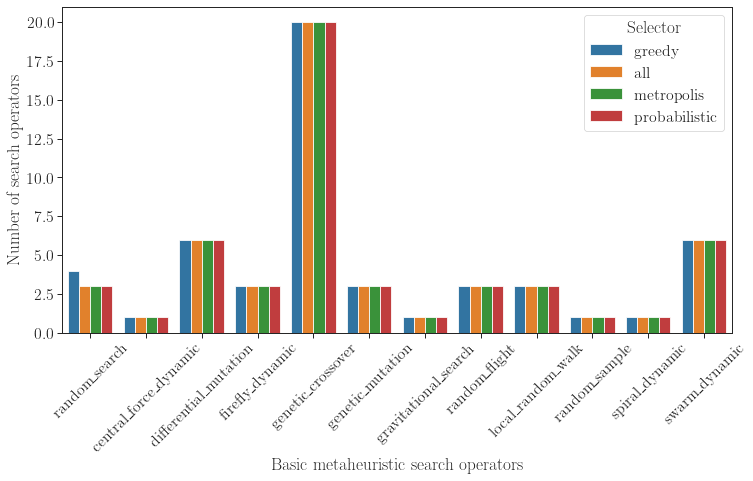

In [58]:
default_heuristic_space = encoded_heuristic_space['default.txt']

mh_so = [mh.replace('_', '\_') for mh, _, _ in default_heuristic_space]
sel_so= [sel.replace('_', '\_') for _, _, sel in default_heuristic_space]
df_default = pd.DataFrame({'Metaheuristic': mh_so, 'Selector': sel_so})


fig, ax = plt.subplots(figsize=(12,6))
fig.subplots_adjust()
##fig.tight_layout()
so_dist = sns.countplot(data=df_default, x='Metaheuristic', hue='Selector', ax=ax, palette='tab10')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
so_dist.set_xlabel(r'Basic metaheuristic search operators')
so_dist.set_ylabel(r'Number of search operators')

if is_saving:
    plt.savefig(folder_name + 'search_operators_collection_default.' + saving_format,
               format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
if show_plots:
    plt.show()

### Percentage of winning per dimension

Exp MLP\_very\_small obtained a 16.121495327102803%!
Exp MLP\_very\_small\_less\_epochs obtained a 16.822429906542055%!
Exp MLP\_small obtained a 16.355140186915886%!
Exp MLP\_decreasing obtained a 18.22429906542056%!
Exp MLP\_increasing obtained a 20.794392523364486%!
Exp MLP\_deep obtained a 24.299065420560748%!
Exp LSTM\_small obtained a 36.21495327102804%!


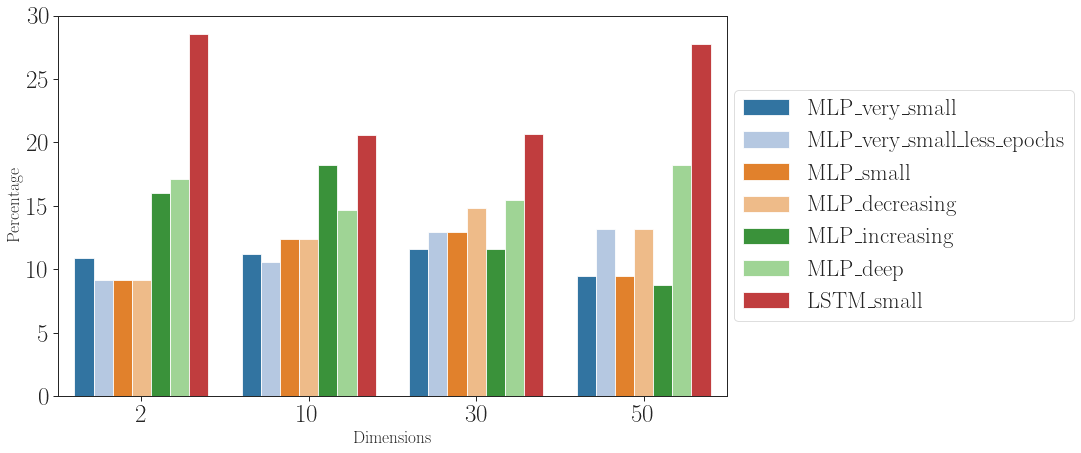

In [59]:
ids_list = full_table['ID'].unique()
dims_list = full_table['Dim'].unique()

A, B, C = [], [], []
for Id in ids_list:
    for Dim in dims_list:
        A.append(Id)
        B.append(Dim)
        cnt = ((full_table['ID'] == Id) & (full_table['Dim'] == Dim) & (full_table['Rank'] == 1)).sum()
        C.append(cnt)
best_table_rank = pd.DataFrame({'ID': A, 'Dim': B, 'Count': C})

sums_id = dict()
for Id in ids_list:
    Idx = (best_table_rank['ID'] == Id) 
    sums_id[Id] = best_table_rank[Idx]['Count'].sum()
    print(f'Exp {Id} obtained a {100*(sums_id[Id]/len(long_problems))}%!')
        
sums_dim = dict()
for Dim in dims_list:
    Idx = (best_table_rank['Dim'] == Dim)
    sums_dim[Dim] = best_table_rank[Idx]['Count'].sum()
        

best_table_rank_dim = best_table_rank.copy()
for idx in best_table_rank_dim.index:
    x = best_table_rank_dim.iloc[idx]
    best_table_rank_dim.loc[idx, 'Count'] = 100*x['Count'] / sums_dim[x['Dim']]

fig, ax = plt.subplots(figsize=(12,7))
fig.subplots_adjust()
#fig.tight_layout()
plt.rc('legend',fontsize=23) # using a size in points
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.titlesize'] = 38
p_1_winner = sns.barplot(data=best_table_rank_dim, x='Dim', y='Count', hue='ID', palette='tab20')
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", borderaxespad=0)
p_1_winner.set_xlabel('Dimensions')
p_1_winner.set_ylabel('Percentage')

if is_saving:
    plt.savefig(folder_name + results_file_name + '_' + 'Rank_Winner_dim.' + saving_format,
               format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
if show_plots:
    plt.show()

### Violin plots

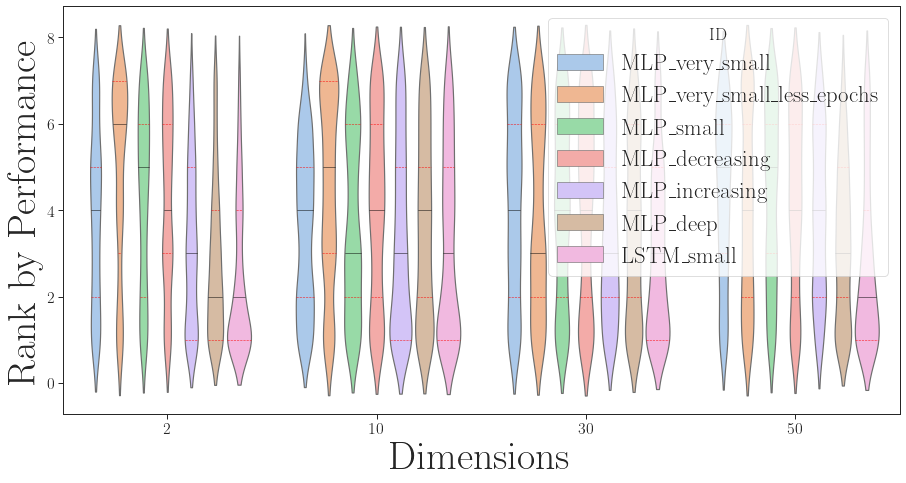

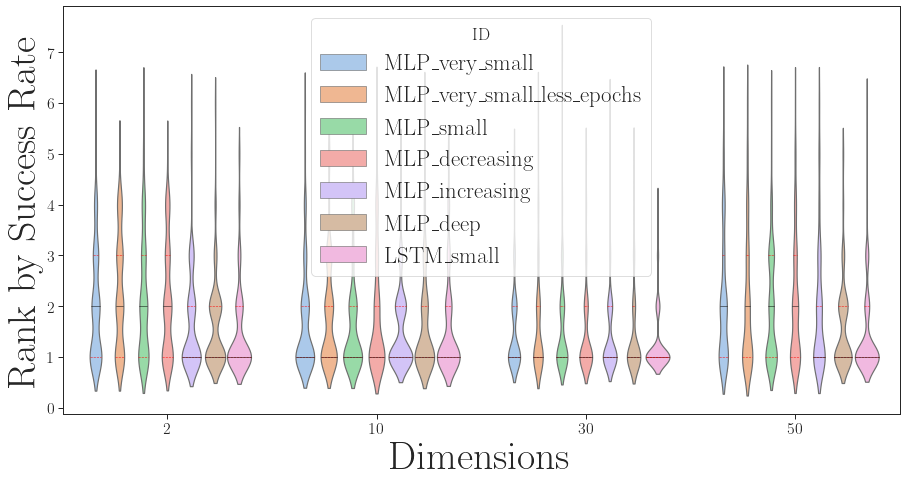

In [60]:
def change_quartiles(ax):
    for l in ax.lines:
        l.set_linestyle('--')
        l.set_linewidth(0.6)
        l.set_color('red')
        l.set_alpha(0.8)
    for l in ax.lines[1::3]:
        l.set_linestyle('-')
        l.set_linewidth(0.6)
        l.set_color('black')
        l.set_alpha(0.8)

plt.figure(figsize=[15, 7.5])
p2 = sns.violinplot(data=full_table, hue='ID', x='Dim', y='Rank', palette="pastel", #cut=0,
                    linestyle=':', scale="area", inner="quartile")
change_quartiles(p2)

plt.ylabel(r'Rank by Performance'), plt.xlabel(r'Dimensions')

if is_saving:
    plt.savefig(folder_name + 'RankPerf_vs_Dim-Violin.' + saving_format,
                format=saving_format, dpi=333, transparent=True)

plt.show()

plt.figure(figsize=[15, 7.5])
p3 = sns.violinplot(data=full_table,hue='ID', x='Dim', y='RankSR', palette="pastel", #cut=0,
                    linestyle=':', scale="area", inner="quartile")
# sns.displot(data=full_table, hue='Pop', col='Dim', x='RankSR', kind='kde')
change_quartiles(p3)

plt.ylabel(r'Rank by Success Rate'), plt.xlabel(r'Dimensions')

if is_saving:
    plt.savefig(folder_name + 'RankSR_vs_Dim-Violin.' + saving_format,
                format=saving_format, dpi=333, transparent=True)

plt.show()

### Rank average per experiment

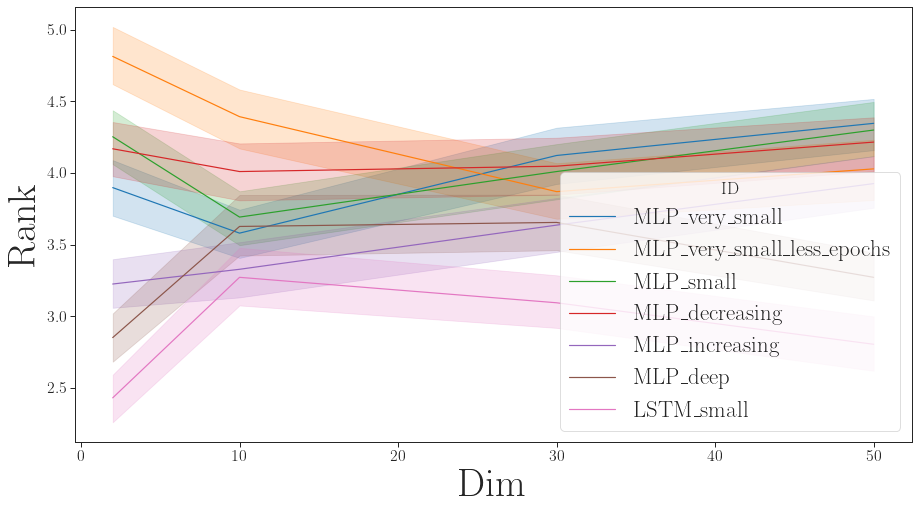

In [61]:
plt.figure(figsize=[15, 8])
sns.lineplot(data=full_table, x='Dim', y='Rank', palette='tab10', hue='ID')

if is_saving:
    plt.savefig(folder_name + results_file_name + '_' + 'Rank_vs_Dim_Id-Line.' + saving_format, format=saving_format, dpi=333, bbox_inches="tight", transparent=True)

if show_plots:
    plt.show()

### Success against bMH and RS

Exp MLP\_very\_small obtain a percentage of 88.14783347493628% agaisnt BMHs
Exp MLP\_very\_small obtain a percentage of 75.0% agaisnt uMHs


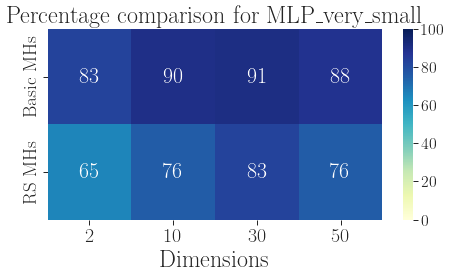

Exp MLP\_very\_small\_less\_epochs obtain a percentage of 87.64160294534125% agaisnt BMHs
Exp MLP\_very\_small\_less\_epochs obtain a percentage of 71.26168224299064% agaisnt uMHs


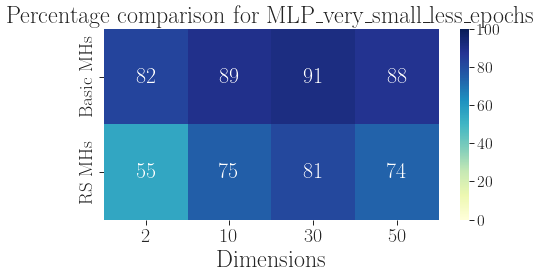

Exp MLP\_small obtain a percentage of 87.77612574341546% agaisnt BMHs
Exp MLP\_small obtain a percentage of 72.42990654205607% agaisnt uMHs


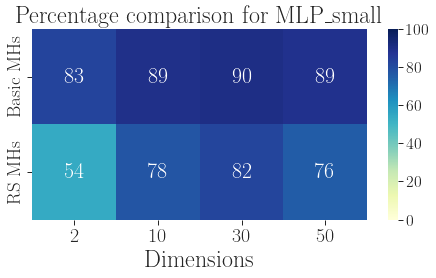

Exp MLP\_decreasing obtain a percentage of 87.8150665533843% agaisnt BMHs
Exp MLP\_decreasing obtain a percentage of 71.72897196261682% agaisnt uMHs


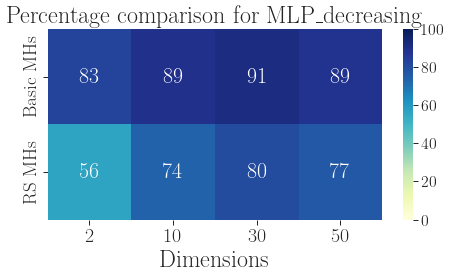

Exp MLP\_increasing obtain a percentage of 89.08595298782214% agaisnt BMHs
Exp MLP\_increasing obtain a percentage of 76.86915887850466% agaisnt uMHs


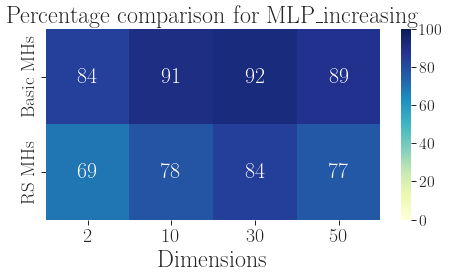

Exp MLP\_deep obtain a percentage of 89.20631549136222% agaisnt BMHs
Exp MLP\_deep obtain a percentage of 76.86915887850466% agaisnt uMHs


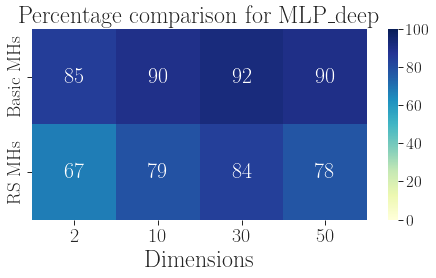

Exp LSTM\_small obtain a percentage of 89.58156329651658% agaisnt BMHs
Exp LSTM\_small obtain a percentage of 79.2056074766355% agaisnt uMHs


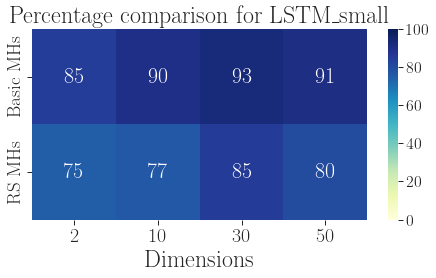

In [62]:
# Comparison of experiments against basic MH and uMH30
success_table_basic = full_table.groupby(['ID', 'Dim'])['successRate'].mean()
success_table_uMH30 = full_table.groupby(['ID', 'Dim'])['successRateUMH30'].mean()
table_bydim_basic = success_table_basic.reset_index().set_index('Dim')
table_bydim_uMH30 = success_table_uMH30.reset_index().set_index('Dim')
dims = table_bydim_basic.index.unique()
ids = table_bydim_basic['ID'].unique()
ids = ids_list

plt.rc('font', size=22)     # family='serif',

ids_dict = dict()
avgs_dict = dict({
    'Basic MHs': [],
    'RS MHs': []
})
A, B = 0, 0
for id in ids:
    
    plt.rcParams['axes.labelsize'] = 24
    plt.rcParams['axes.titlesize'] = 24
    ids_dict['Basic MHs'] = list(table_bydim_basic[table_bydim_basic['ID'] == id]['successRate']*100) 
    ids_dict['RS MHs'] = list(table_bydim_uMH30[table_bydim_uMH30['ID'] == id]['successRateUMH30']*100) 
    avg_mh = np.average(ids_dict['Basic MHs'])
    avg_rs = np.average(ids_dict['RS MHs'])
    print(f'Exp {id} obtain a percentage of {avg_mh}% agaisnt BMHs')
    print(f'Exp {id} obtain a percentage of {avg_rs}% agaisnt uMHs')
    avgs_dict['Basic MHs'].append(avg_mh)
    avgs_dict['RS MHs'].append(avg_rs)
    A += avg_mh
    #A += avg_rs
    B += 1
    
    df = pd.DataFrame(ids_dict, index=dims)
    df = df.rename_axis('Dimensions')
    df = df.T
    fig, ax = plt.subplots(figsize=(7.5,3.5))
    fig.subplots_adjust()
    #fig.tight_layout()
    sns.heatmap(df, vmin=0, vmax=100, annot=True,  cmap="YlGnBu")
    plt.title(f'Percentage comparison for {id}')#, fontsize=20)
    
    plt.rcParams['axes.labelsize'] = 24
    plt.rcParams['axes.titlesize'] = 24
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=19)

    id_text = id.replace('\\', '')

    if is_saving:
        plt.savefig(folder_name  +  f'{id_text}_Percentage_cmp_BMH_UMH30.' + saving_format,
                format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
    if show_plots:
        plt.show()

### Overall percentage against literature

real prom 88.46492292753976


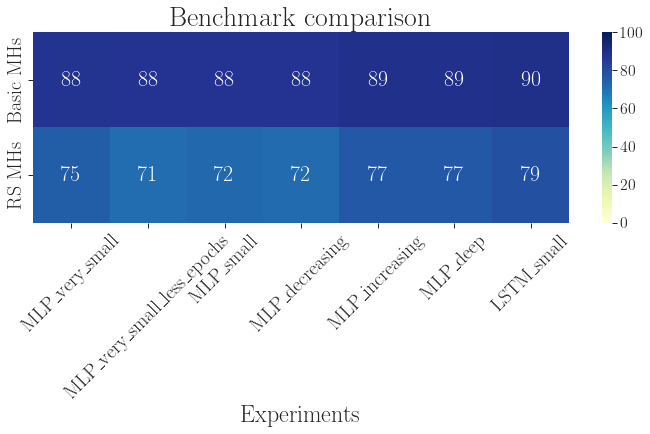

In [63]:
# Experiments vs Literature
print('real prom', (A/B))
df = pd.DataFrame(avgs_dict, index=ids)
df = df.rename_axis('Experiments')
fig, ax = plt.subplots(figsize=(12,3.5))
fig.subplots_adjust()
#fig.tight_layout()
sns.heatmap(df.T, vmin=0, vmax=100, annot=True,  cmap="YlGnBu")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.rc('font', size=23)     # family='serif',

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 28
plt.title(f'Benchmark comparison')
if is_saving:
    plt.savefig(folder_name  +  f'{results_file_name}_cmp_BMH_UMH30.' + saving_format,
            format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
if show_plots:
    plt.show()

### Experiments vs Literature (Chart)

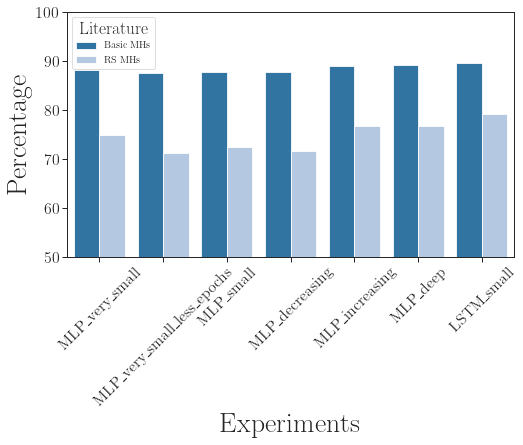

In [64]:
plt.rc('font', size=18)     # family='serif',

df2_dict = dict()
df2_dict['Experiments'] = []
df2_dict['Percentage'] = []
df2_dict['Literature'] = []
for column in df:
    for exp, row in zip(ids, df[column]):
        df2_dict['Experiments'].append(exp)
        df2_dict['Percentage'].append(row)
        df2_dict['Literature'].append(column)
df2 = pd.DataFrame(df2_dict)
    
fig, ax = plt.subplots(figsize=(8,4.5))
fig.subplots_adjust()
#fig.tight_layout()
plt.rc('legend',fontsize=10) # using a size in points
p_3_6_winner = sns.barplot(data=df2, x='Experiments', y='Percentage', hue='Literature', palette='tab20')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
p_3_6_winner.set_xlabel(r'Experiments')
p_3_6_winner.set_ylabel('Percentage')
plt.ylim([50, 100])

if is_saving:
    plt.savefig(folder_name  +  f'{results_file_name}_bar_cmp_BMH_UMH30.' + saving_format,
            format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
if show_plots:
    plt.show()

### Unfolded MH 50 pop

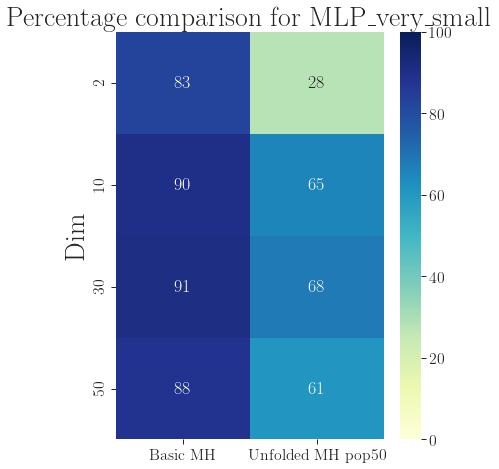

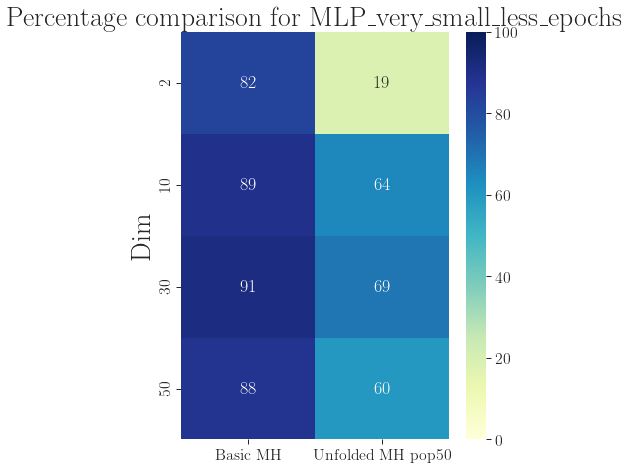

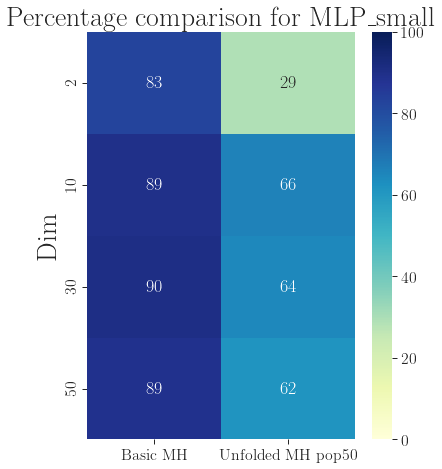

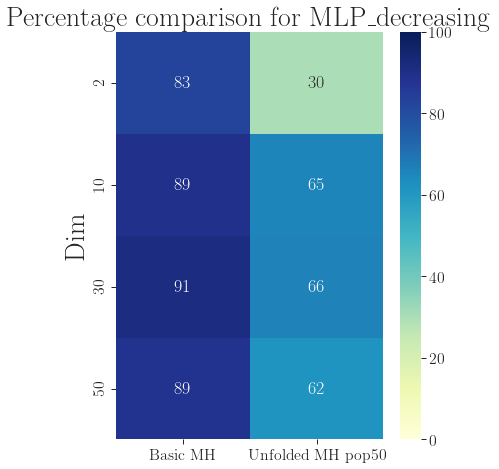

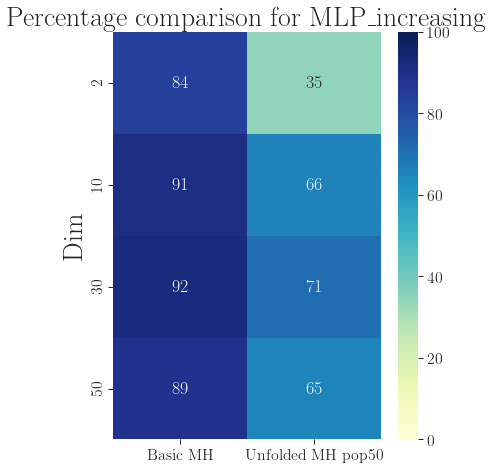

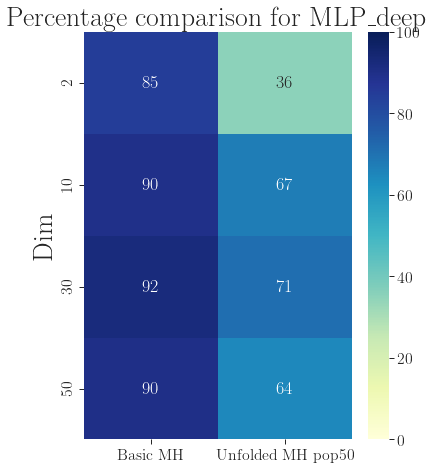

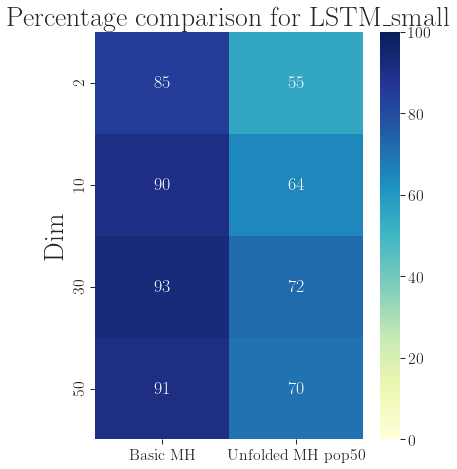

In [65]:
success_table_basic = full_table.groupby(['ID', 'Dim'])['successRate'].mean()
success_table_uMH50 = full_table.groupby(['ID', 'Dim'])['successRateUMH50'].mean()
table_bydim_basic = success_table_basic.reset_index().set_index('Dim')
table_bydim_uMH50 = success_table_uMH50.reset_index().set_index('Dim')
dims = table_bydim_basic.index.unique()
ids = table_bydim_basic['ID'].unique()

ids_dict = dict()
for exp_id in exp_ids:
    ids_dict['Basic MH'] = list(table_bydim_basic[table_bydim_basic['ID'] == exp_id]['successRate']*100)
    ids_dict['Unfolded MH pop50'] = list(table_bydim_uMH50[table_bydim_uMH50['ID'] == exp_id]['successRateUMH50']*100)
    df = pd.DataFrame(ids_dict, index=dims)
    
    fig, ax = plt.subplots(figsize=(6,7.5))
    fig.subplots_adjust()
    #fig.tight_layout()
    sns.heatmap(df, vmin=0, vmax=100, annot=True,  cmap="YlGnBu")
    plt.title(f'Percentage comparison for {exp_id}')
    
    id_text = id.replace('\\', '')

    if is_saving:
        plt.savefig(folder_name  +  f'{id_text}_Percentage_cmp_BMH_UMH50.' + saving_format,
                format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
    if show_plots:
        plt.show()

### Wilcoxon test (per experiment)

Testing MLP\_very\_small





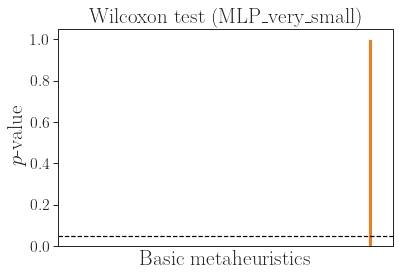

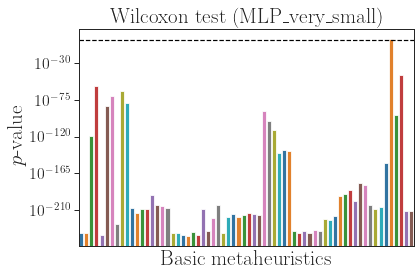

Testing MLP\_very\_small\_less\_epochs





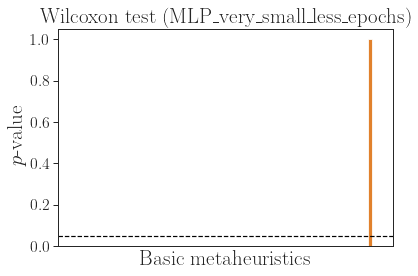

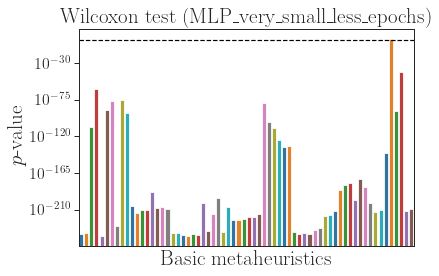

Testing MLP\_small





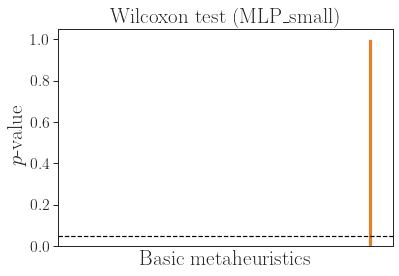

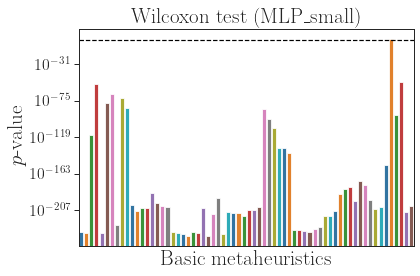

Testing MLP\_decreasing





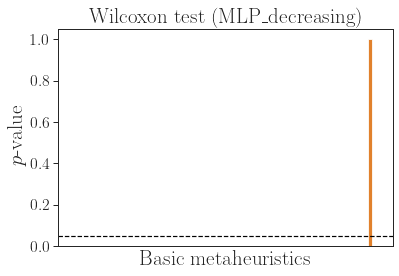

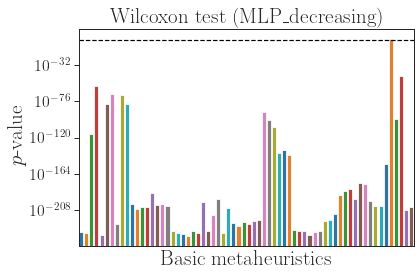

Testing MLP\_increasing





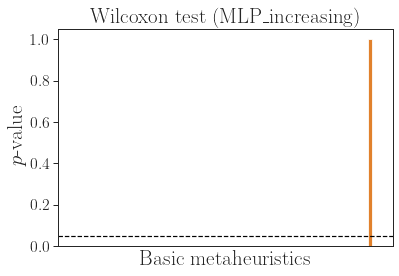

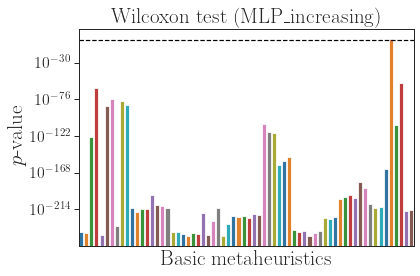

Testing MLP\_deep





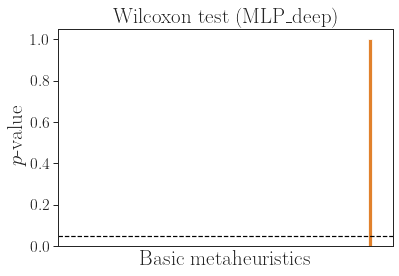

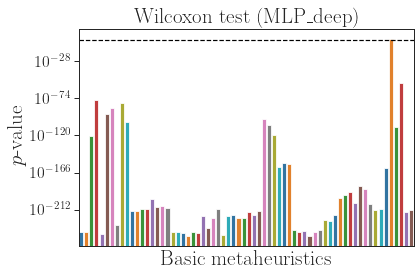

Testing LSTM\_small





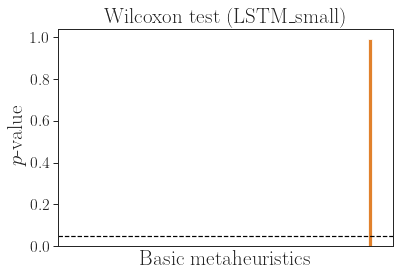

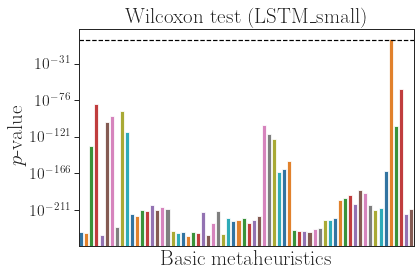

In [66]:
# Wilcoxon test without Dimensions
plt.rc('font', size=18)     # family='serif',
p_value = 0.05
print_winners = False
cnt_bMHs = len(basic_mhs_data['results'][0]['operator_id'])

plt.rcParams['axes.labelsize'] = 21
plt.rcParams['axes.titlesize'] = 21

for exp_id in exp_ids:
    print(f'Testing {exp_id}')
    
    p_values_bMHs = [stats_results[(exp_id, f'bMH_{bMH_id}', 'wilcoxon', 'less')]
                     for bMH_id in range(cnt_bMHs)]
    
    for id_mh, pvalue_mh in enumerate(p_values_bMHs):
        if pvalue_mh > p_value and print_winners:
            print('Winner: ', basic_mhs_collection[id_mh])
    
    print('\n\n')
    fig, ax = plt.subplots(figsize=(6,4))
    fig.subplots_adjust()
    #fig.tight_layout()
    df_pvalues = pd.DataFrame({'Basic MH': list(range(len(p_values_bMHs))), 'p-value': p_values_bMHs })
    barplottt = sns.barplot(x=df_pvalues['Basic MH'], y=df_pvalues['p-value'], palette='tab10')
    ax.axhline(y=0.05, color='black', linestyle='--')
    barplottt.set_yscale('linear')
    barplottt.set(xticks=[])
    ax.set_xlabel('Basic metaheuristics')
    ax.set_ylabel('$p$-value')
    ax.set_title(f"Wilcoxon test ({exp_id})")
    id_text = exp_id.replace('\\', '')
    
    plt.rcParams['axes.labelsize'] = 21
    plt.rcParams['axes.titlesize'] = 21

    if is_saving:
        plt.savefig(folder_name +  f'{id_text}_pvalue_linear_scale.' + saving_format,
                format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
    if show_plots:
        plt.show()

    
    fig, ax = plt.subplots(figsize=(6,4))
    fig.subplots_adjust()
    #fig.tight_layout()
    barplottt = sns.barplot(x=df_pvalues['Basic MH'], y=df_pvalues['p-value'], palette='tab10')
    ax.axhline(y=0.05, color='black', linestyle='--')
    barplottt.set_yscale('log')
    barplottt.set(xticks=[])
    ax.set_xlabel('Basic metaheuristics')
    ax.set_ylabel('$p$-value')
    ax.set_title(f"Wilcoxon test ({exp_id})")
    id_text = exp_id.replace('\\', '')
    if is_saving:
        plt.savefig(folder_name +  f'{id_text}_pvalue_log_scale.' + saving_format,
                format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
    if show_plots:
        plt.show()

### Wilcoxon test multicomparison (per experiment)

Testing MLP\_very\_small


/var/folders/sd/mj1s90s113x7h3d6fy196d200000gn/T/ipykernel_59779/2248813894.py:52: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim(0, sub_limit)  # most of the data


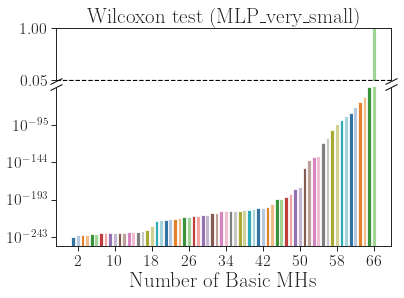

Testing MLP\_very\_small\_less\_epochs


/var/folders/sd/mj1s90s113x7h3d6fy196d200000gn/T/ipykernel_59779/2248813894.py:52: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim(0, sub_limit)  # most of the data


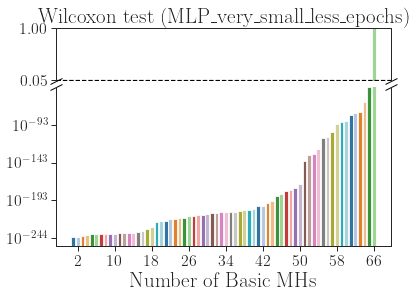

Testing MLP\_small


/var/folders/sd/mj1s90s113x7h3d6fy196d200000gn/T/ipykernel_59779/2248813894.py:52: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim(0, sub_limit)  # most of the data


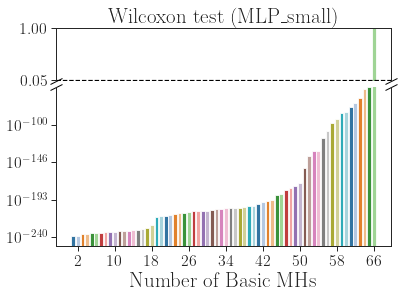

Testing MLP\_decreasing


/var/folders/sd/mj1s90s113x7h3d6fy196d200000gn/T/ipykernel_59779/2248813894.py:52: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim(0, sub_limit)  # most of the data


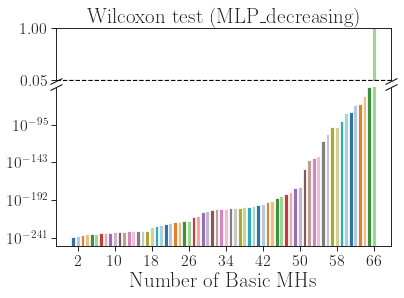

Testing MLP\_increasing


/var/folders/sd/mj1s90s113x7h3d6fy196d200000gn/T/ipykernel_59779/2248813894.py:52: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim(0, sub_limit)  # most of the data


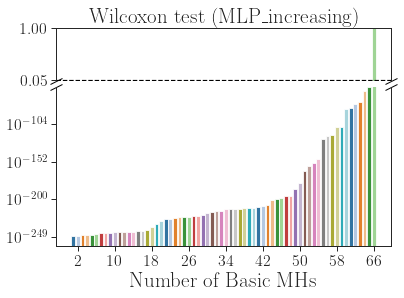

Testing MLP\_deep


/var/folders/sd/mj1s90s113x7h3d6fy196d200000gn/T/ipykernel_59779/2248813894.py:52: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim(0, sub_limit)  # most of the data


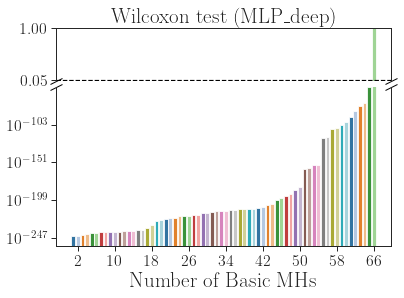

Testing LSTM\_small


/var/folders/sd/mj1s90s113x7h3d6fy196d200000gn/T/ipykernel_59779/2248813894.py:52: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim(0, sub_limit)  # most of the data


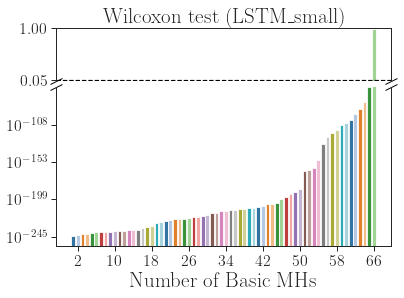

In [67]:

plt.rcParams['axes.labelsize'] = 21
plt.rcParams['axes.titlesize'] = 21


mp.dps = 1e3
cnt_bMHs = len(basic_mhs_data['results'][0]['operator_id'])

for exp_id in exp_ids:
    print(f'Testing {exp_id}')
    
    p_values_bMHs = [stats_results[(exp_id, f'bMH_{bMH_id}', 'wilcoxon', 'less')]
                     for bMH_id in range(cnt_bMHs)]
    
    p_values_with_id = [(p_value, id) for id, p_value in enumerate(p_values_bMHs)]
    p_values_with_id.sort()

    acum = mpf(1)
    join_pval = []
    sub_limit = 0.05
    for p_value, _ in p_values_with_id[:]:
        acum *= 1-mpf(p_value)
        #print(acum)
        res = 1 - acum
        join_pval.append(float(res))
        if res < 0.05:
            sub_limit = float(res)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})#figsize=(6,4))
    fig.subplots_adjust(hspace=0.05)
    #fig.tight_layout()
    df_pvalues = pd.DataFrame({'Number of basic MHs': list(range(1, len(p_values_bMHs)+1)), 'p-value': join_pval })
    barplottt = sns.barplot(ax=ax2, x=df_pvalues['Number of basic MHs'], y=df_pvalues['p-value'], palette='tab20')
    barplottt2 = sns.barplot(ax=ax1, x=df_pvalues['Number of basic MHs'], y=df_pvalues['p-value'], palette='tab20')
    
    
    ax1.axhline(y=0.05, color='black', linestyle='--')

    barplottt.set_yscale('log')
    num_ticks = 8
    spaces = len(p_values_with_id) // num_ticks
    positions = np.array(range(1, len(p_values_with_id)+1, spaces))
    barplottt.set(xticks=positions)
    #barplottt2.set(xticks=[])
    ax2.set_xlabel('Number of Basic MHs')
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax2.set_ylabel('')
    ax1.set_title(f"Wilcoxon test ({exp_id})")
    id_text = exp_id.replace('\\', '')
    
    ax1.set_ylim(0.03, 1.)  # outliers only
    ax2.set_ylim(0, sub_limit)  # most of the data
        
        # hide the spines between ax and ax2
    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(top=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    # Now, let's turn towards the cut-out slanted lines.
    # We create line objects in axes coordinates, in which (0,0), (0,1),
    # (1,0), and (1,1) are the four corners of the axes.
    # The slanted lines themselves are markers at those locations, such that the
    # lines keep their angle and position, independent of the axes size or scale
    # Finally, we need to disable clipping.

    d = 0.5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)

    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    plt.setp(ax1, xticks=[], yticks=[0.05,  1])


    def get_exponent(A):
        (_, digits, exponent) = Decimal(A).as_tuple()
        return len(digits) + exponent - 1

    min_exp = get_exponent(join_pval[0])
    max_exp = get_exponent(sub_limit)
    
    min_lim = 10** (min_exp-1)
    
    fstqrt = 10** ((max_exp+min_exp)//2)
    sndqrt = 10** ((max_exp+3*min_exp)//4)
    trdqrt = 10** ((min_exp+3*max_exp)//4)
    plt.setp(ax2, xticks=positions, yticks=[min_lim, fstqrt, sndqrt, trdqrt])

    #plt.setp(ax2, xticks=[], yticks=[0.05, 0.5, 1])
    
    
    
    if is_saving:
        plt.savefig(folder_name +  f'{id_text}_groups_wilcoxon.' + saving_format,
                format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
    if show_plots:
        plt.show()


### Wilcoxon test (per dimension)

In [68]:
p_value = 0.05

def wilcoxon_by_dimensions_plot():
    filter_by_dim = lambda a, b: [c for (c, d) in zip(a, b) if d]

    for id in ids:
        for dim in dimensions:
            results_stats = []
            performance_id = list(data_tables[id]['Performance'])
            dim_allowed = list(data_tables[id]['Dim'] == str(dim))
            perf_filter = filter_by_dim(performance_id, dim_allowed)
            print(f'Testing {id}')
            for i, x in enumerate(dict_basicMH_perf):
                bMH_filtered = filter_by_dim(dict_basicMH_perf[x], dim_allowed)
                _, p = st.wilcoxon(perf_filter, bMH_filtered, alternative='less')
                if p > p_value:
                    print('Winner: ', basic_mhs_collection[i])
                results_stats.append(p)
            print('\n\n')
            fig, ax = plt.subplots(figsize=(6,4))
            fig.subplots_adjust()
            #fig.tight_layout()
            df = pd.DataFrame({'Basic MHs': list(range(len(results_stats))), 'p-value': results_stats})
            barplottt = sns.barplot(x=df['Basic MHs'], y=df['p-value'], palette='tab10')
            ax.axhline(y=p_value, color='black', linestyle='--')
            barplottt.set_yscale('linear')
            barplottt.set(xticks=[])
            ax.set_xlabel('Basic metaheuristics')
            ax.set_ylabel('$p$-value')
            ax.set_title(f"Wilcoxon test for dimension {dim} ({id}, linear scale)")
            id_text = id.replace('\\', '')

            if is_saving:
                plt.savefig(folder_name +  f'{id_text}_dim{dim}_pvalue_linear_scale.' + saving_format,
                        format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
            if show_plots:
                plt.show()

            fig, ax = plt.subplots(figsize=(6,4))
            fig.subplots_adjust()
            #fig.tight_layout()
            barplottt = sns.barplot(x=df['Basic MHs'], y=df['p-value'], palette='tab10')
            ax.axhline(y=p_value, color='black', linestyle='--')
            barplottt.set_yscale('log')
            barplottt.set(xticks=[])
            ax.set_xlabel('Basic metaheuristics')
            ax.set_ylabel('$p$-value')
            ax.set_title(f"Wilcoxon test for dimension {dim} ({id}, log scale)")
            id_text = id.replace('\\', '')
            if is_saving:
                plt.savefig(folder_name +  f'{id_text}_dim{dim}_pvalue_log_scale.' + saving_format,
                        format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
            if show_plots:
                plt.show()

### Wilcoxon results - pvalues

In [69]:
# Wilcoxon against uMH30 
for exp_id in exp_ids:
    print(f'Experiment {exp_id} vs uMH30; pvalue = ', stats_results[(exp_id, 'unfolded\_mh\_pop30', 'wilcoxon', 'less')])
    
# %% ------------------------------- Eleventh plot -------------------------------
# Wilcoxon against uMH50
for exp_id in exp_ids:
    print(f'Experiment {exp_id} vs uMH50; pvalue = ', stats_results[(exp_id, 'unfolded\_mh\_pop50', 'wilcoxon', 'less')])
        
# %% ------------------------------- Twelfth plot -------------------------------
# Wilcoxon against bMHs
for exp_id in exp_ids:
    p_values_bMHs = [stats_results[(exp_id, f'bMH_{bMH_id}', 'wilcoxon', 'less')]
                     for bMH_id in range(cnt_bMHs)]  
    p_values_bMHs = [mpf(pvalue) for pvalue in p_values_bMHs]
    p_value_mix = 1 - np.prod(1 - np.array(p_values_bMHs))
    print(f'Experiment {exp_id} vs bMHs; pvalue = ', round(p_value_mix, 20))

Experiment MLP\_very\_small vs uMH30; pvalue =  1.5413270543798418e-80
Experiment MLP\_very\_small\_less\_epochs vs uMH30; pvalue =  4.347696440323319e-71
Experiment MLP\_small vs uMH30; pvalue =  4.0247760343582864e-75
Experiment MLP\_decreasing vs uMH30; pvalue =  6.348666506773935e-75
Experiment MLP\_increasing vs uMH30; pvalue =  7.933036864296521e-88
Experiment MLP\_deep vs uMH30; pvalue =  2.17391101480228e-90
Experiment LSTM\_small vs uMH30; pvalue =  9.25706878554551e-96
Experiment MLP\_very\_small vs uMH50; pvalue =  4.830789171289194e-11
Experiment MLP\_very\_small\_less\_epochs vs uMH50; pvalue =  1.0715256676013156e-08
Experiment MLP\_small vs uMH50; pvalue =  2.4754570551494034e-08
Experiment MLP\_decreasing vs uMH50; pvalue =  2.2150727587914555e-10
Experiment MLP\_increasing vs uMH50; pvalue =  1.5628638655485559e-18
Experiment MLP\_deep vs uMH50; pvalue =  2.183633118456729e-17
Experiment LSTM\_small vs uMH50; pvalue =  2.627633110042096e-26
Experiment MLP\_very\_small 

### Wilcoxon matrix

                                MLP\_very\_small  \
MLP\_very\_small                            1.00   
MLP\_very\_small\_less\_epochs              0.02   
MLP\_small                                  0.28   
MLP\_decreasing                             0.18   
MLP\_increasing                             0.00   
MLP\_deep                                   0.00   
LSTM\_small                                 0.00   

                                MLP\_very\_small\_less\_epochs  MLP\_small  \
MLP\_very\_small                                          0.02        0.28   
MLP\_very\_small\_less\_epochs                            1.00        0.08   
MLP\_small                                                0.08        1.00   
MLP\_decreasing                                           0.83        0.44   
MLP\_increasing                                           0.00        0.00   
MLP\_deep                                                 0.00        0.00   
LSTM\_small                          

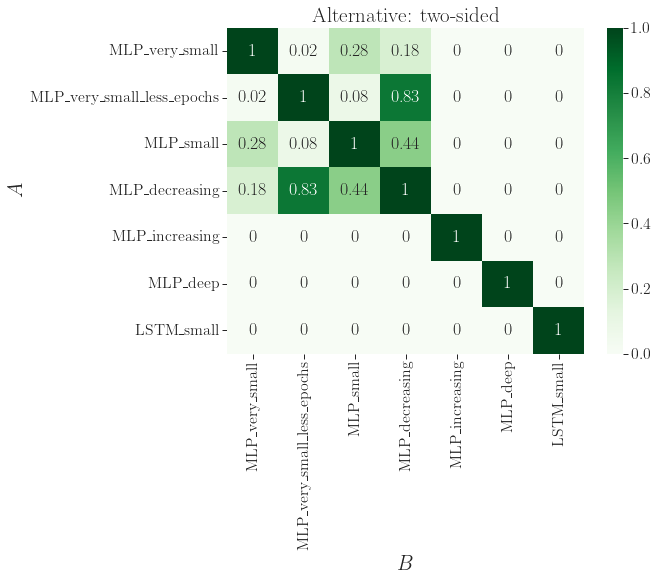

                                MLP\_very\_small  \
MLP\_very\_small                            1.00   
MLP\_very\_small\_less\_epochs              0.01   
MLP\_small                                  0.86   
MLP\_decreasing                             0.09   
MLP\_increasing                             0.00   
MLP\_deep                                   0.00   
LSTM\_small                                 0.00   

                                MLP\_very\_small\_less\_epochs  MLP\_small  \
MLP\_very\_small                                          0.99        0.14   
MLP\_very\_small\_less\_epochs                            1.00        0.04   
MLP\_small                                                0.96        1.00   
MLP\_decreasing                                           0.59        0.78   
MLP\_increasing                                           0.00        0.00   
MLP\_deep                                                 0.00        0.00   
LSTM\_small                          

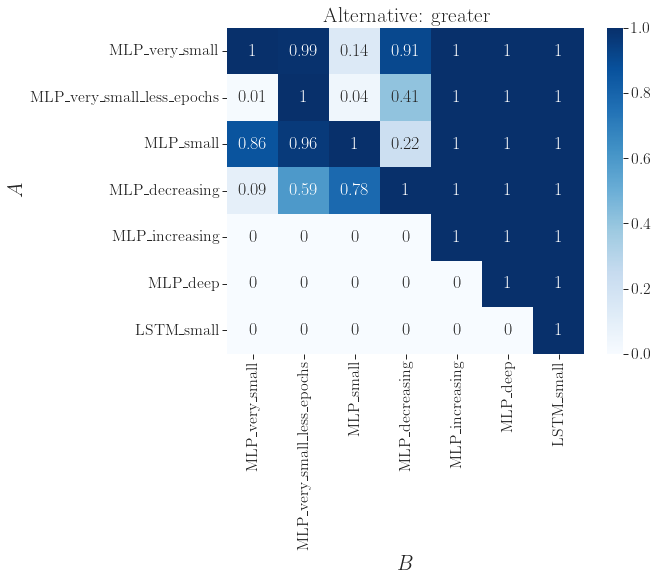

                                MLP\_very\_small  \
MLP\_very\_small                            1.00   
MLP\_very\_small\_less\_epochs              0.99   
MLP\_small                                  0.14   
MLP\_decreasing                             0.91   
MLP\_increasing                             1.00   
MLP\_deep                                   1.00   
LSTM\_small                                 1.00   

                                MLP\_very\_small\_less\_epochs  MLP\_small  \
MLP\_very\_small                                          0.01        0.86   
MLP\_very\_small\_less\_epochs                            1.00        0.96   
MLP\_small                                                0.04        1.00   
MLP\_decreasing                                           0.41        0.22   
MLP\_increasing                                           1.00        1.00   
MLP\_deep                                                 1.00        1.00   
LSTM\_small                          

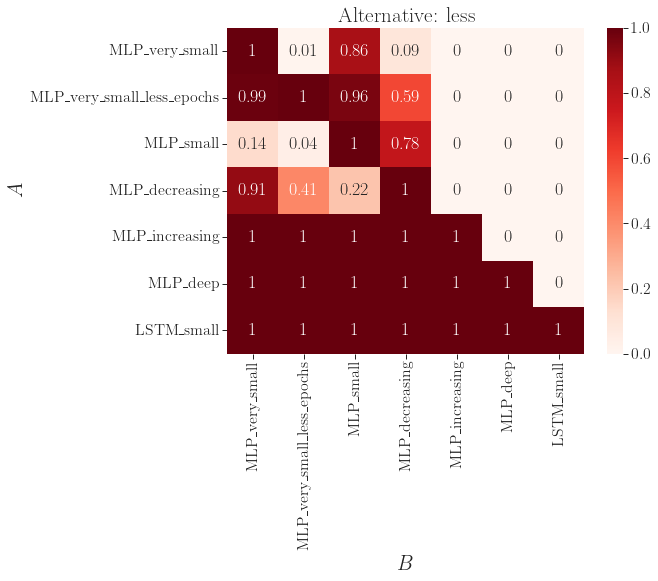

In [70]:
# Wilcoxon between ids (all alternativies)
colors_alt = dict({
    'two-sided': 'Greens',
    'less': 'Reds',
    'greater': 'Blues'
})
for alternative in wilcoxon_alternativies:
    fig, ax = plt.subplots(figsize=(8,6))
    plt.rc('font', size=18)     # family='serif',

    fig.subplots_adjust()
    #fig.tight_layout()
    dict_comparison = dict()

    for exp_idA in exp_ids:
        p_values_B = [stats_results[(exp_idA, exp_idB, 'wilcoxon', alternative)]
                        for exp_idB in exp_ids]
        dict_comparison[exp_idA] = [round(pvalue, 2) for pvalue in p_values_B]

    df_comparison = pd.DataFrame(dict_comparison, index=exp_ids)
    sns.heatmap(df_comparison, vmin=0, vmax=1, annot=True,  cmap=colors_alt[alternative])
    ax.set_title(f'Alternative: {alternative}')
    ax.set_xlabel('$B$')
    ax.set_ylabel('$A$')
    print(df_comparison)
    if is_saving:
        plt.savefig(folder_name + results_file_name + '_' + f'wilcoxon_all_pairs_{alternative}.' + saving_format,
                format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
    if show_plots:
        plt.show()


### Cardinality plots

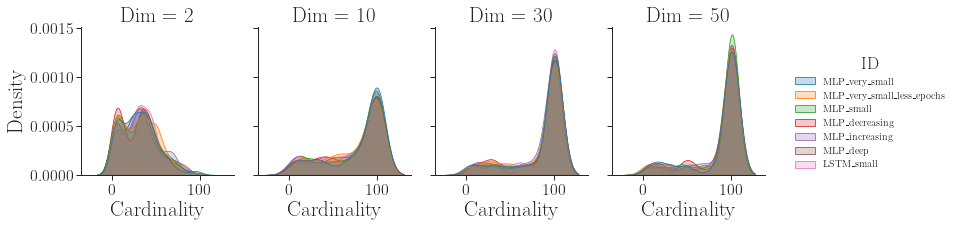

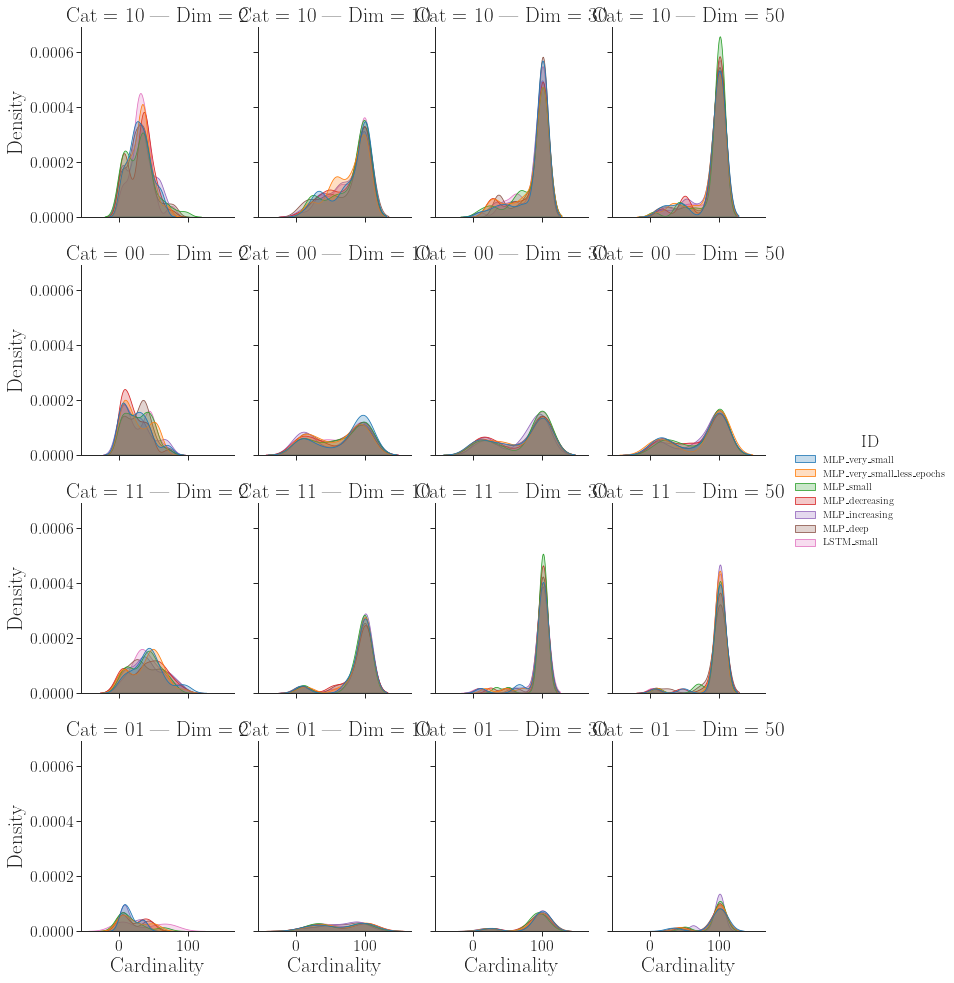

In [71]:
# Cardinality comparison
p_5 = sns.displot(data=full_table, hue='ID', col='Dim', x='Cardinality', kind='kde', palette='tab10', height=3.5,
                 aspect=0.8, fill=True)

if is_saving:
    p_5.savefig(folder_name + results_file_name + '_' + 'Card_vs_Dim_Id-KDE.' + saving_format, format=saving_format, dpi=333, bbox_inches="tight", transparent=True)

if show_plots:
    plt.show()
    
p_5 = sns.displot(data=full_table, hue='ID', col='Dim', row='Cat', x='Cardinality', kind='kde', palette='tab10', height=3.5,
                 aspect=0.8, fill=True)

if is_saving:
    p_5.savefig(folder_name + results_file_name + '_' + 'Card_vs_Dim_Id-KDE_splitted.' + saving_format, format=saving_format, dpi=333, bbox_inches="tight", transparent=True)

if show_plots:
    plt.show()
    

### Extension of winner per category

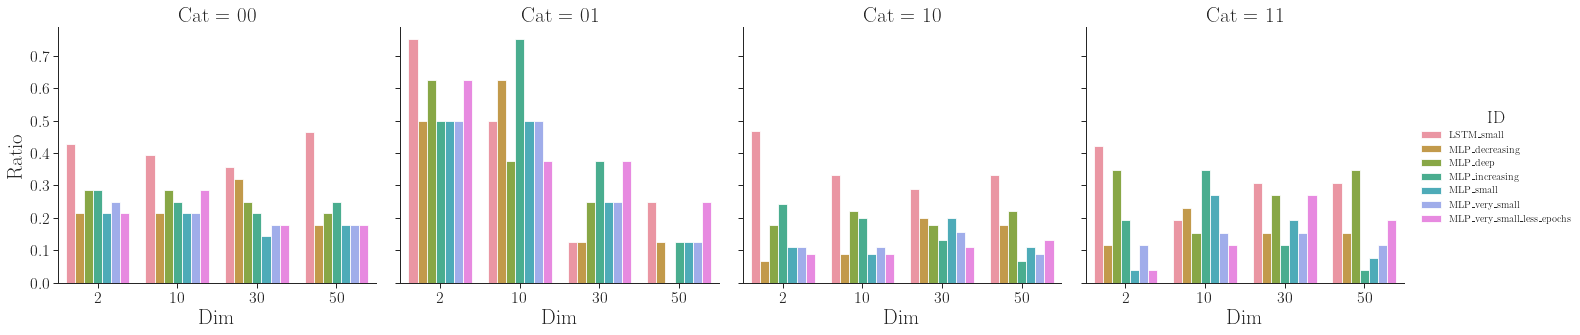

In [72]:
place1st_table = full_table.groupby(by=['Dim', 'ID', 'Cat'])['Rank']\
    .apply(list)\
    .transform(lambda x: len([xx for xx in x if xx < 1.5]) / len(x))\
    .reset_index(name='Ratio')

sns.catplot(data=place1st_table, x='Dim', y='Ratio', hue='ID', col='Cat', kind='bar')
plt.show()

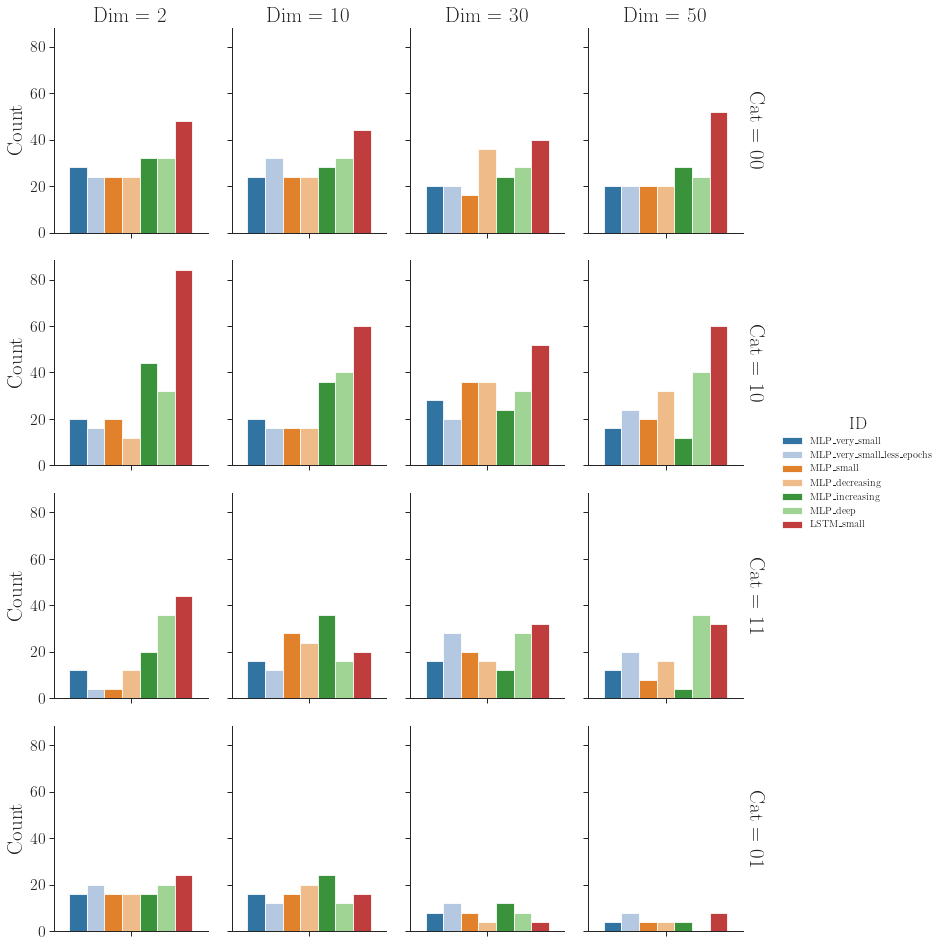

In [73]:
# Comparison of winners per category 
rank_1 = full_table['Rank'] == 1
table_rank_1 = full_table[rank_1]
plt.rc('font', size=18)     # family='serif',

p_1_optional = sns.catplot(data=table_rank_1, hue='ID', x='Rank',row='Cat',  col='Dim', kind='count', height=3.5, aspect=0.8, legend=True, palette='tab20', margin_titles=True)


#plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", borderaxespad=0)
p_1_optional.set(xlabel=None).set(xticklabels=[])

#p_1_optional.set_xlabels(r'Dimension')
#_1_optional.set_xlabels(False)

plt.rc('legend',fontsize=20) # using a size in points
plt.yticks(fontsize=24)
plt.rcParams['axes.labelsize'] = 30
#plt.rcParams['axes.titlesize'] = 30

p_1_optional.set_ylabels('Count')
if is_saving:
    p_1_optional.savefig(folder_name + results_file_name + '_' + 'Rank_vs_Id_and_Dim_Cat-BestRanked.' + saving_format,
               format=saving_format, dpi=333, bbox_inches="tight", transparent=True)

if show_plots:
    plt.show()

### Search operator quantity per experiment

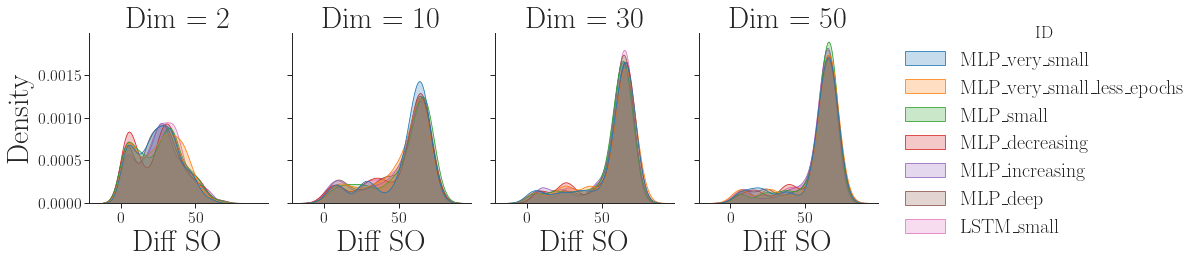

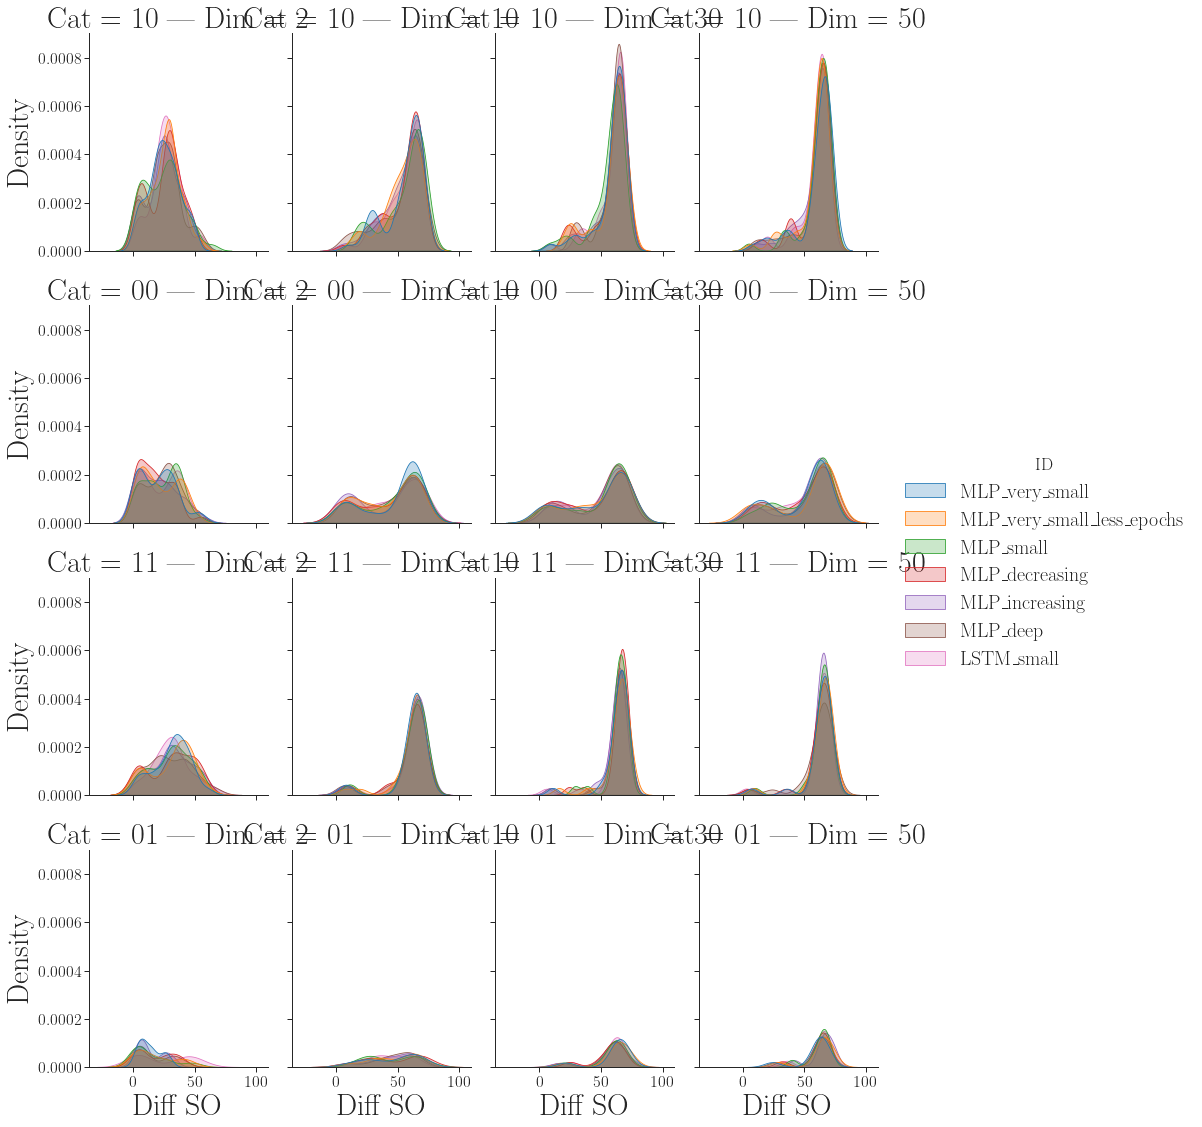

In [74]:
p_5_so = sns.displot(data=full_table, hue='ID', col='Dim', x='Unique', kind='kde', palette='tab10', height=4,
                 aspect=0.8, fill=True)
p_5_so.set_xlabels('Diff SO')

if is_saving:
    p_5_so.savefig(folder_name + results_file_name + '_' + 'Unique_vs_Dim_Id-KDE.' + saving_format, format=saving_format, dpi=333, bbox_inches="tight", transparent=True)

if show_plots:
    plt.show()

p_5_so = sns.displot(data=full_table, hue='ID', col='Dim', row='Cat', x='Unique', kind='kde', palette='tab10', height=4,
                 aspect=0.8, fill=True)
p_5_so.set_xlabels('Diff SO')

if is_saving:
    p_5_so.savefig(folder_name + results_file_name + '_' + 'Unique_vs_Dim_Id-KDE_splitted.' + saving_format, format=saving_format, dpi=333, bbox_inches="tight", transparent=True)

if show_plots:
    plt.show()

### Ratio of SearchOperators/Cardinality plots

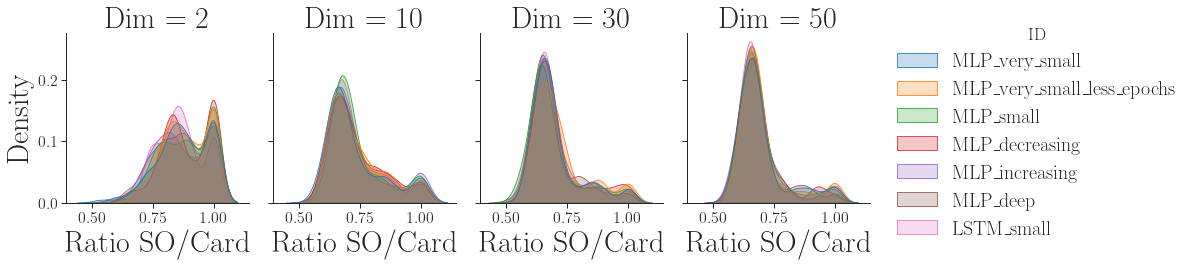

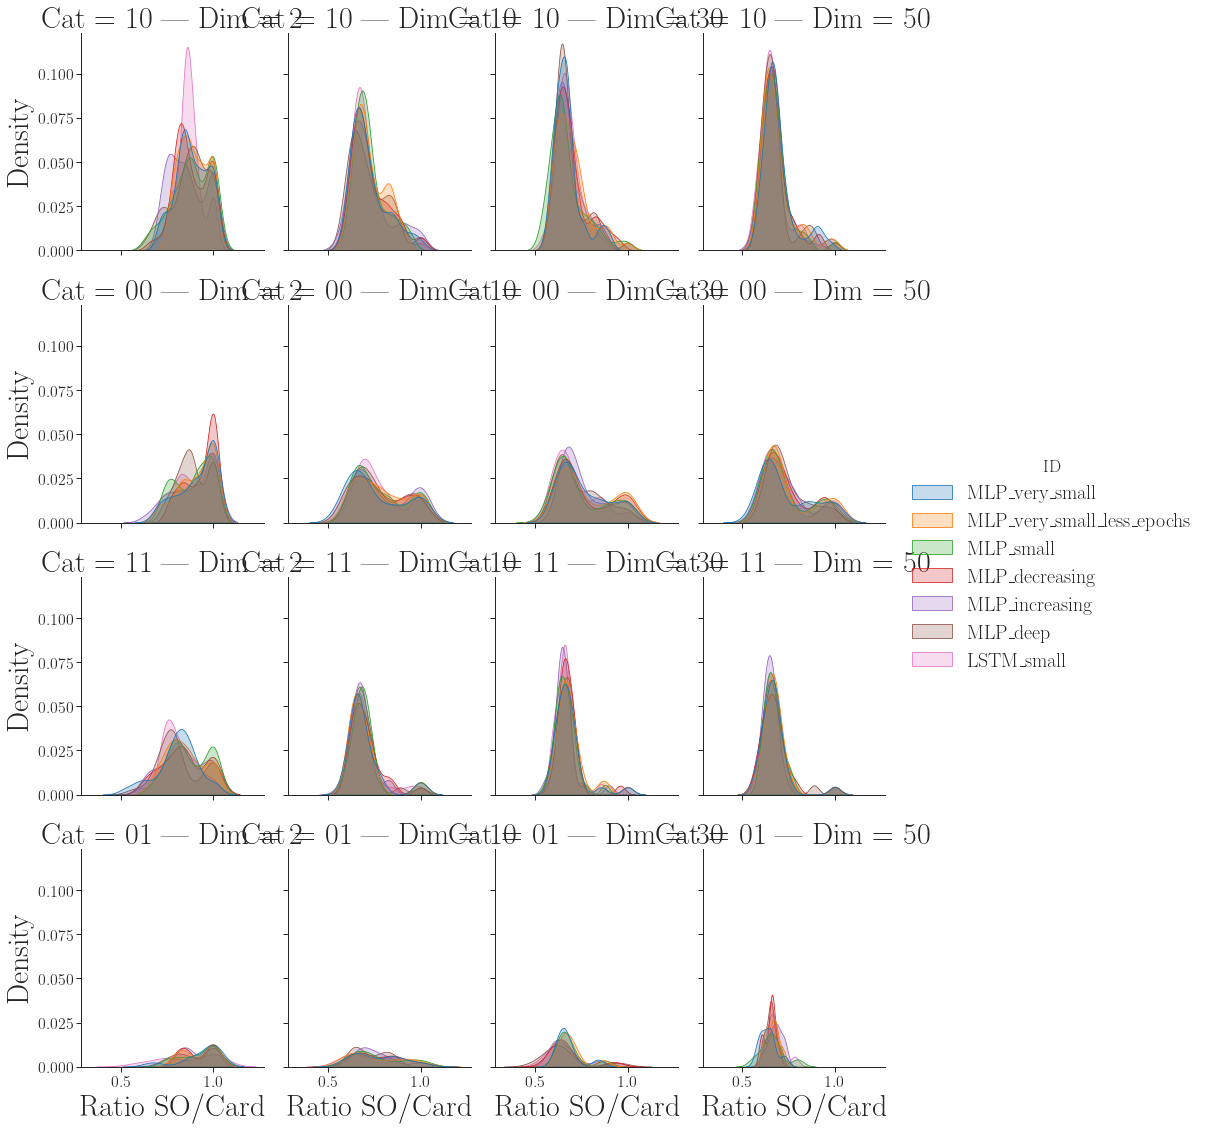

In [75]:
p_5_so = sns.displot(data=full_table, hue='ID', col='Dim', x='RatioCU', kind='kde', palette='tab10', height=4,
                 aspect=0.8, fill=True)
p_5_so.set_xlabels('Ratio SO/Card')

if is_saving:
    p_5_so.savefig(folder_name + results_file_name + '_' + 'RatioSObyCard_vs_Dim_Id-KDE.' + saving_format, format=saving_format, dpi=333, bbox_inches="tight", transparent=True)

if show_plots:
    plt.show()

p_5_so = sns.displot(data=full_table, hue='ID', col='Dim', row='Cat', x='RatioCU', kind='kde', palette='tab10', height=4,
                 aspect=0.8, fill=True)
p_5_so.set_xlabels('Ratio SO/Card')

if is_saving:
    p_5_so.savefig(folder_name + results_file_name + '_' + 'RatioSObyCard_vs_Dim_Id-KDE_splitted.' + saving_format, format=saving_format, dpi=333, bbox_inches="tight", transparent=True)

if show_plots:
    plt.show()

### Normal distribution tests

The following exps follows a normal distribution for experiment MLP\_very\_small
10 32
2 0
30 56
50 56


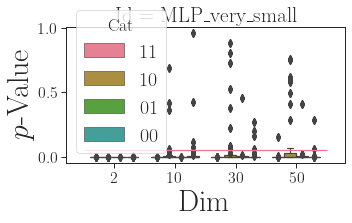

The following exps follows a normal distribution for experiment MLP\_very\_small\_less\_epochs
10 24
2 8
30 64
50 60


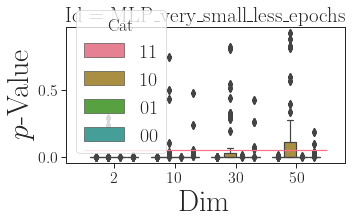

The following exps follows a normal distribution for experiment MLP\_small
10 40
2 4
30 64
50 44


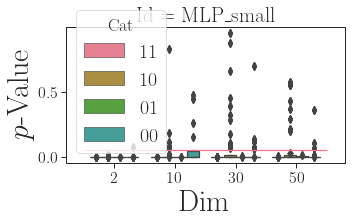

The following exps follows a normal distribution for experiment MLP\_decreasing
10 44
2 4
30 52
50 64


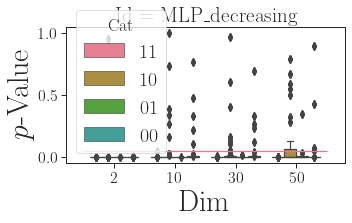

The following exps follows a normal distribution for experiment MLP\_increasing
10 36
2 0
30 60
50 52


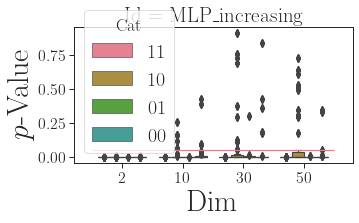

The following exps follows a normal distribution for experiment MLP\_deep
10 52
2 4
30 44
50 72


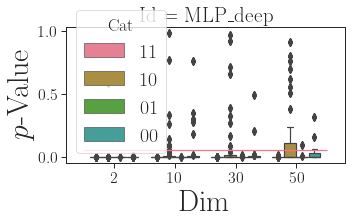

The following exps follows a normal distribution for experiment LSTM\_small
10 60
2 0
30 64
50 68


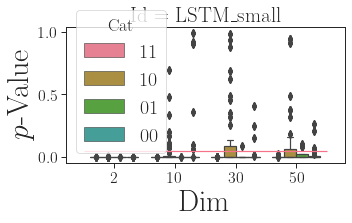

In [76]:
def plot_pvalue_boxplot(data_table, id):
    fig = plt.figure(figsize=(5, 2.5))
    sns.boxplot(data=data_table, x='Dim', y='pValue', hue='Cat', hue_order=categories)
    plt.hlines(0.05, -0.5, len(dimensions)-0.5)
    plt.ylabel(r'$p$-Value')
    plt.title(r'Id = {}'.format(id))
    

    print('The following exps follows a normal distribution for experiment', id)
    pvalues = list(data_table.groupby('Dim')['pValue'])
    for dim, pvals in pvalues:
        print(dim, sum(np.array(pvals) >= 0.05))
    
    if show_plots:
        plt.show()

    if is_saving:
        id_file = ''.join(c for c in id if c not in '\\')
        fig.savefig(folder_name + results_file_name + '_' + 'pValue-id_{}-CatDim-BoxPlot.'.format(id_file) + saving_format,
                    format=saving_format, dpi=333, bbox_inches="tight", transparent=True)


for pop, data_table in data_tables.items():
    plot_pvalue_boxplot(data_table, pop)

### Time complexity plot

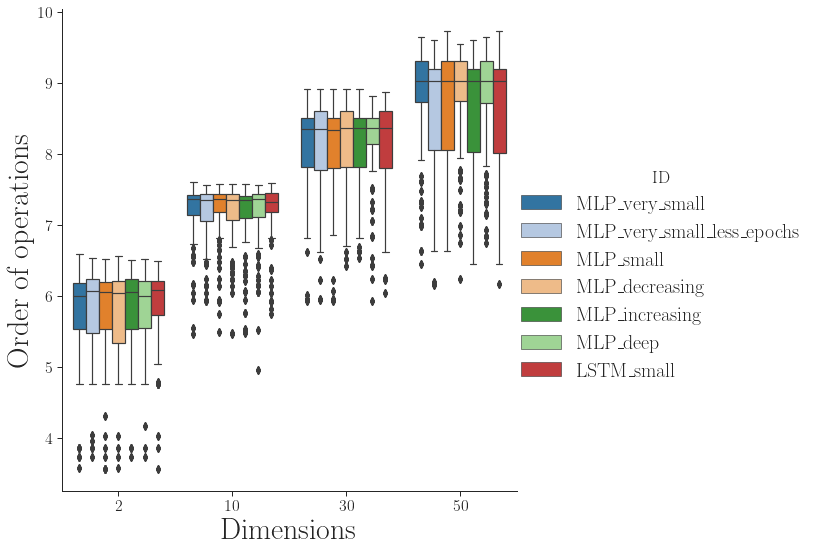

In [77]:
p9 = sns.catplot(data=full_table, hue='ID', x='Dim', y='tcMH', kind='box', palette='tab20', height=8)\
    .set(xlabel=r'Dimensions', ylabel=r'Order of operations') #, $\log_{10}(T_{HH})$')  ,col='Cat'


if is_saving:
    p9.savefig(folder_name + f'{results_file_name}-OperNum-MH-Box.' + saving_format, format=saving_format, dpi=333, transparent=True)

plt.show()

### Ranking plot

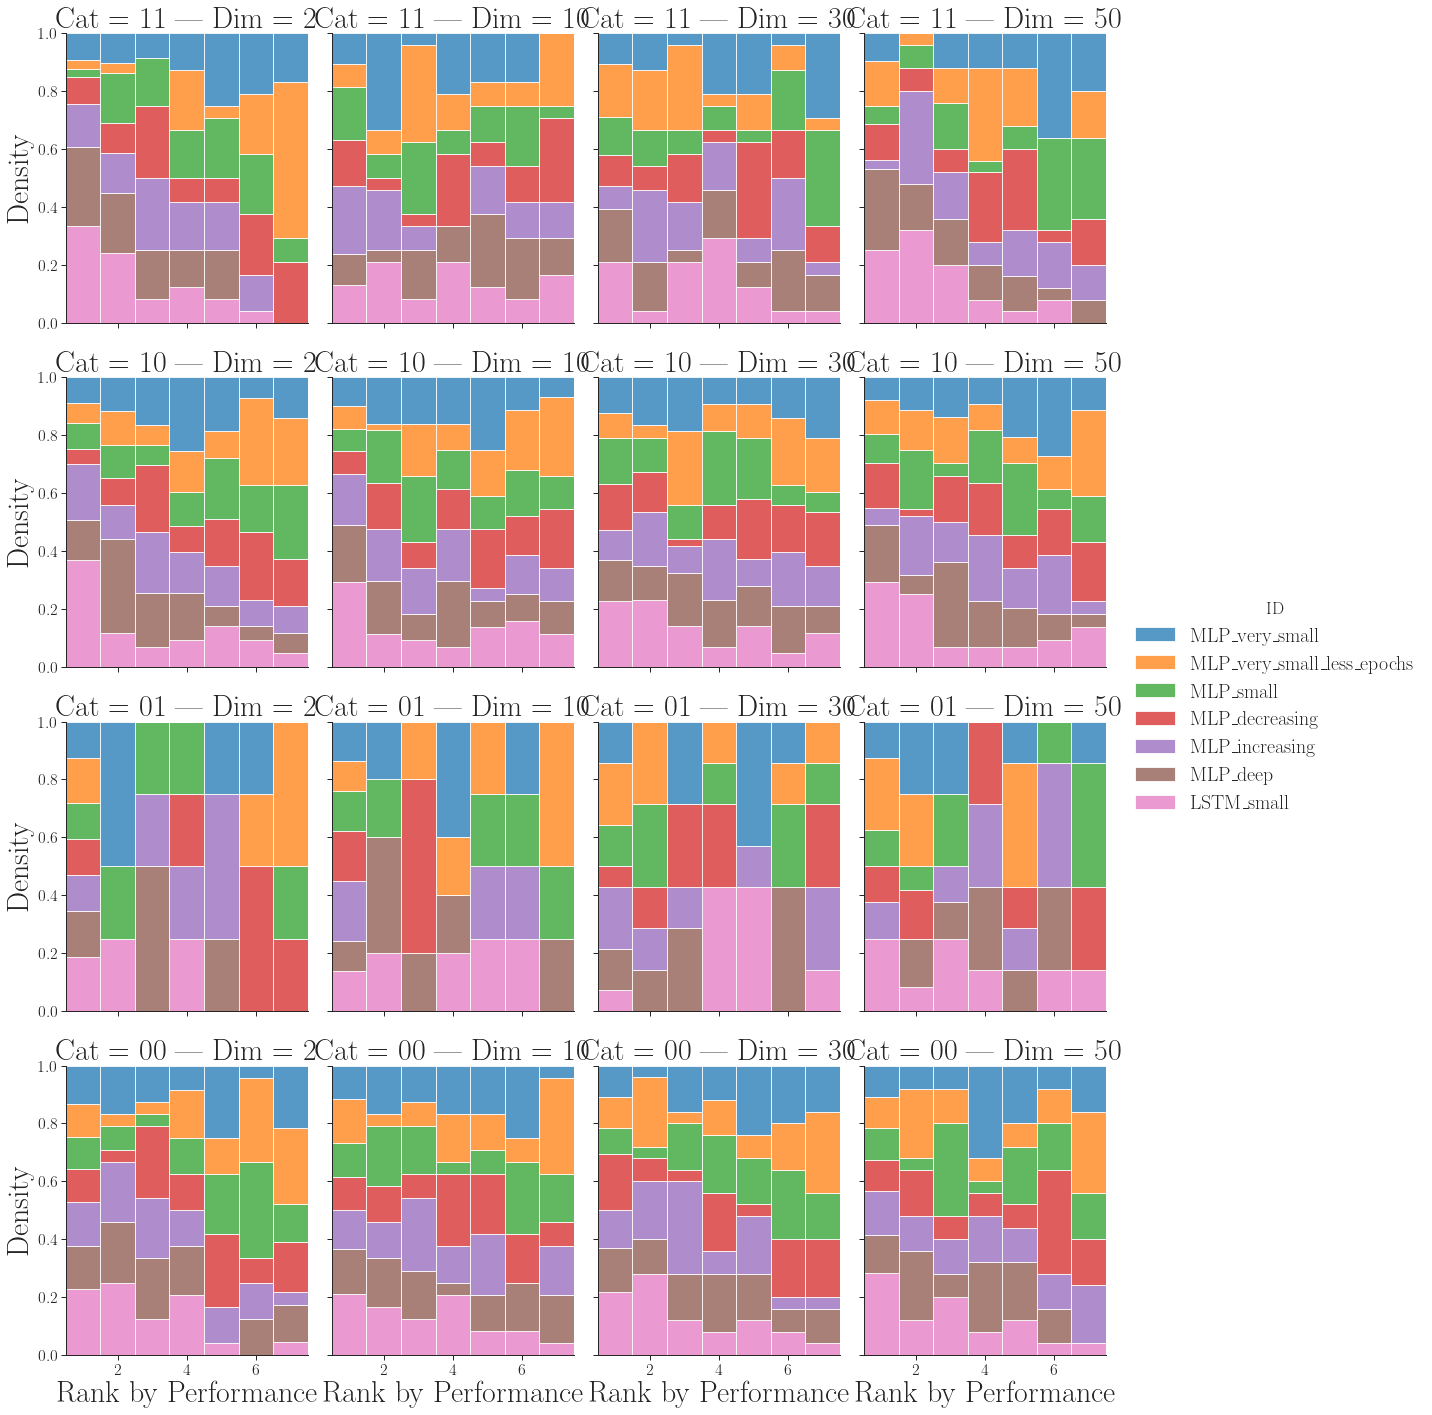

In [78]:
p1 = sns.displot(data=full_table, hue='ID', col='Dim', row='Cat', x='Rank', kind='hist', palette='tab10', fill=True,
                 row_order=categories, multiple="fill", height=5, aspect=0.8, legend=True, stat="density", discrete=True)
p1.set_xlabels(r'Rank by Performance')

if is_saving:
    p1.savefig(folder_name + 'Rank_vs_Pop_and_Dim_Cat-FillDistr.' + saving_format,
               format=saving_format, dpi=333, transparent=True)

plt.show()

### Operator Families

In [79]:
families = list(operator_families.keys())
operator_table = full_table.groupby(by=['Dim', 'ID'])['operatorFamily']\
    .apply(list)\
    .transform(lambda x: np.concatenate(x))\
    .transform(lambda x: [families[y] for y in x])  # .reset_index(level=0)

CF: has less than 5 elements
GS: has less than 5 elements
RX: has less than 5 elements
SD: has less than 5 elements
RX: has less than 5 elements
FD: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements


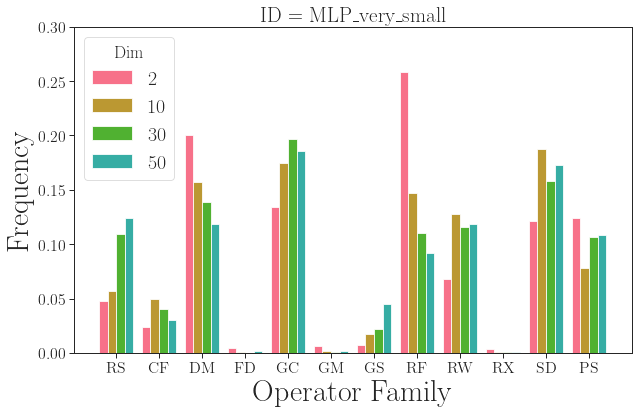

RX: has less than 5 elements


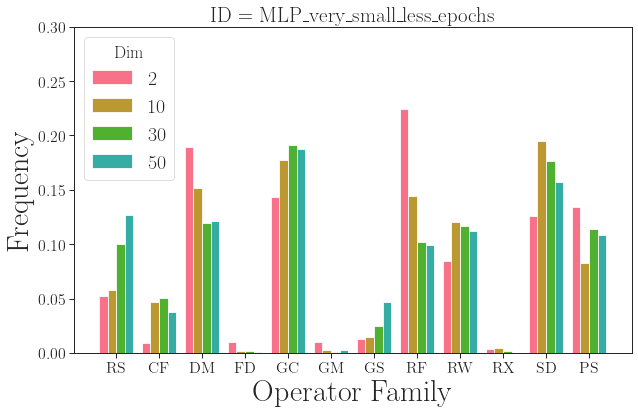

RX: has less than 5 elements
RX: has less than 5 elements


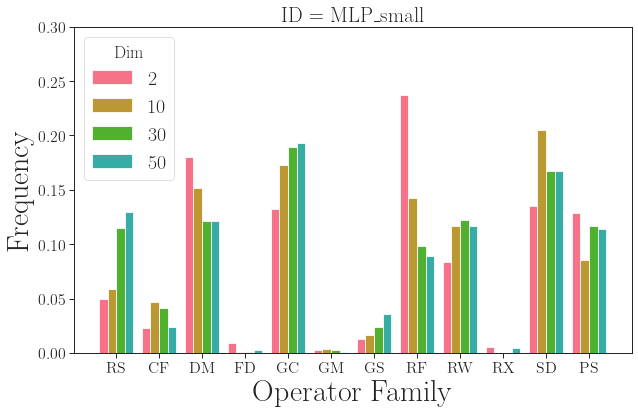

RX: has less than 5 elements
RX: has less than 5 elements


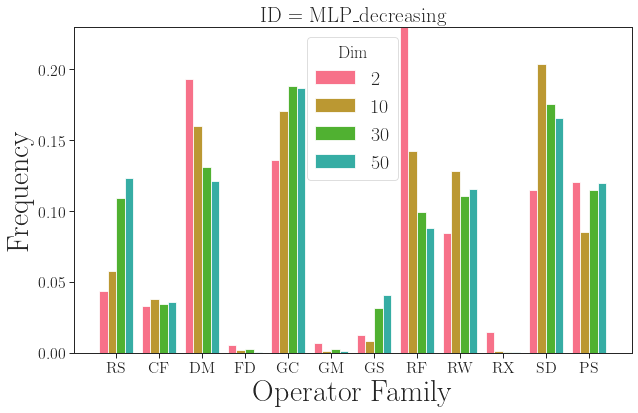

RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements


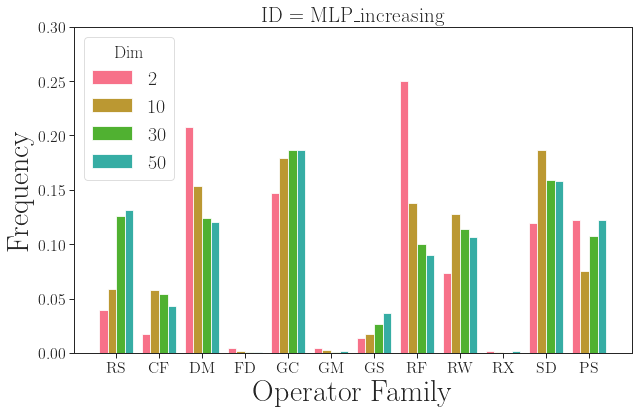

RX: has less than 5 elements
RX: has less than 5 elements


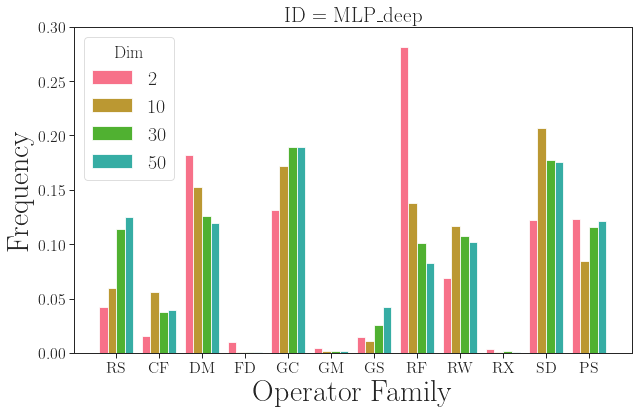

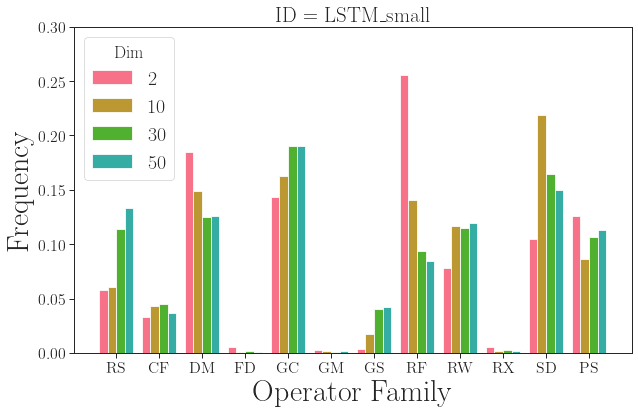

In [80]:
def get_count(lst, without_div=False):
    output = dict()
    total = len(lst)
    for oper in list(perturbator_alias.values()):
        listtt =  tl.listfind(lst, oper)
        if len(listtt) < 5:
            print(f'{oper}: has less than 5 elements')
        output[oper] = listtt.__len__() / total if without_div is False else listtt.__len__()
    return output


pre_hist_heuristic_space = get_count([perturbator_alias[x[0]] for x in encoded_heuristic_space['default.txt']])


def plot_hist_ope_fam():
    # x_labels = list(operator_families.keys())
    bin_centres = np.arange(len(operator_families))
    bin_edges = np.arange(len(operator_families) + 1) - 0.5
    for id in list(data_tables.keys()):
        weights = list()
        vals = list()
        fig, ax = plt.subplots(figsize=(10, 6))
        # plt.ion()

        for dim in dimensions:
            # flat_list.append([sublist for sublist in operator_table.loc[(dim, id)]])
            raw_hist = get_count(operator_table.loc[(dim, id)])
            hist_data = {key: raw_hist[key] / pre_hist_heuristic_space[key] for key in pre_hist_heuristic_space.keys()}

            val, weight = zip(*[(k, v) for k, v in hist_data.items()])
            weights.append(weight)
            vals.append(bin_centres)

        # plt.ioff()
        plt.hist(vals, weights=weights, bins=bin_edges, label=[str(x) for x in dimensions], density=True)
        plt.title(r'ID = {}'.format(id))
        plt.xlabel(r'Operator Family')
        plt.ylabel(r'Frequency')
        plt.xticks(ticks=bin_centres, labels=[r'{}'.format(x) for x in val])
        plt.legend([r'{}'.format(x) for x in dimensions], title=r'Dim')
    
        ylim_id = [0, 0.15]
        for _, x in collection_experiments.items():
            if x['ID'] == id:
                ylim_id = x['ylim']
        plt.ylim(ylim_id)
        plt.show()

        if is_saving:
            fig.savefig(folder_name + 'OperFam-id{}-Hist.'.format(id.replace('\\', '')) + saving_format,
                        format=saving_format, dpi=333, transparent=True)

plot_hist_ope_fam()

### Goodness of fitness test

In [81]:
def calculate_statistic_value_chisquared(A, B):
    statistic_val = 0
    for key in A.keys():
        statistic_val += (A[key]-B[key]) ** 2 / B[key]
    return statistic_val

def chi_squared_goodness_of_fit():
    distributions_exp = dict()
    lens_exp = dict()
    list_exps = list(data_tables.keys())
    
    observed = []
    expected = []
    cmp_type = []
    pvalue_arr = []
    statistic_arr = []
    
    
    for id in list_exps:
        raw_hist = []
        for dim in dimensions:
            raw_hist.extend(operator_table.loc[(dim, id)])
        len_hist = len(raw_hist)
        raw_hist = get_count(raw_hist, without_div=True)
        
        # Set density
        hist_data = {key: raw_hist[key] / pre_hist_heuristic_space[key] for key in pre_hist_heuristic_space.keys()}
        hist_data_sum = sum(hist_data.values())
        hist_data_dens = {key: hist_data[key] / hist_data_sum for key in hist_data.keys()}
        distributions_exp[id] = hist_data_dens         
        
        #Overwrite
        distributions_exp[id] = raw_hist
        lens_exp[id] = len_hist
        
        for dim in dimensions:
            len_hist = len(operator_table.loc[(dim, id)])
            raw_hist = get_count(operator_table.loc[(dim, id)], without_div=True)
            # Set density
            hist_data = {key: raw_hist[key] / pre_hist_heuristic_space[key] for key in pre_hist_heuristic_space.keys()}
            hist_data_sum = sum(hist_data.values())
            hist_data_dens = {key: hist_data[key] / hist_data_sum for key in hist_data.keys()}
            distributions_exp[(id, dim)] = hist_data_dens   
            # Overwrite
            distributions_exp[(id, dim)] = raw_hist   
            lens_exp[(id, dim)] = len_hist
    
    print(distributions_exp)
    for exp_idA in list_exps:
        for exp_idB in list_exps:
            if exp_idA == exp_idB:
                continue
            
            max_lenght = min(lens_exp[exp_idA], lens_exp[exp_idB])
            dist_A = distributions_exp[exp_idA] 
            dist_B = distributions_exp[exp_idB]
            
            dist_A = {k: v/lens_exp[exp_idA] * max_lenght for k, v in dist_A.items()}
            dist_B = {k: v/lens_exp[exp_idB] * max_lenght for k, v in dist_B.items()}
            
            stat_val = st.chisquare(list(dist_A.values()), list(dist_B.values()))
            
            observed.append(exp_idA)
            expected.append(exp_idB)
            cmp_type.append('all')
            pvalue_arr.append(stat_val.pvalue)
            statistic_arr.append(stat_val.statistic)
            
            if stat_val.pvalue > 0.05:
                print('----'*10)
                print(f'Comparison of {exp_idA}, {exp_idB} over all the dims')
                print('  - pvalue: ', stat_val.pvalue)
                print('  - statistic', stat_val.statistic) 
                
                print(exp_idA, dist_A)
                print(exp_idB, dist_B)

            
            for dim in dimensions:
                dist_A = distributions_exp[(exp_idA, dim)] 
                dist_A = {k: v/lens_exp[(exp_idA, dim)] *lens_exp[(exp_idB, dim)] for k, v in dist_A.items()}
                
                dist_B = distributions_exp[(exp_idB, dim)]
                stat_val = st.chisquare(list(dist_A.values()), list(dist_B.values()))
                #stat_val2 = calculate_statistic_value_chisquared(dist_A, dist_B)
                
                observed.append(exp_idA)
                expected.append(exp_idB)
                cmp_type.append(dim)
                pvalue_arr.append(stat_val.pvalue)
                statistic_arr.append(stat_val.statistic)
                if stat_val.pvalue > 0.05:
                    print('--*--'*10)

                    print(f'Comparison of {exp_idA}, {exp_idB} on dim {dim}')
                    print('  - pvalue: ', stat_val.pvalue)
                    print('  - statistic', stat_val.statistic) 
                    
                    print(exp_idA, dim, ': ', dist_A)
                    print(exp_idB, dim, ': ', dist_B)
    return pd.DataFrame.from_dict({
        'observed': observed,
        'expected': expected,
        'cmp_type': cmp_type,
        'pvalue': pvalue_arr,
        'stats': statistic_arr
    })

df = chi_squared_goodness_of_fit()

df

RX: has less than 5 elements
FD: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
RX: has less than 5 elements
{'MLP\\_very\\_small': {'RS': 5616, 'CF': 720, 'DM': 16376, 'FD': 80, 'GC': 67952, 'GM': 124, 'GS': 488, 'RF': 7488, 'RW': 6496, 'RX': 20, 'SD': 3148, 'PS': 11440}, ('MLP\\_very\\_small', 2): {'RS': 336, 'CF': 52, 'DM': 2612, 'FD': 32, 'GC': 5824, 'GM': 40, 'GS': 16, 'RF': 1680, 'RW': 440, 'RX': 8, 'SD': 264, 'PS': 1616}, ('MLP\\_very\\_small', 10): {'RS': 1000, 'CF': 268, 'DM': 5092, 'FD': 20, 'GC': 18964, 'GM': 32, 'GS': 92, 'RF': 2392, 'RW': 2080, 'RX': 4, 'SD': 1016, 'PS': 2532}, ('MLP\\_very\\_small', 30): {'RS': 1952, 'CF': 224, 'DM': 4560, 'FD': 4, 'GC': 21604, 'GM': 16, 'GS': 120

/Users/josetapia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/scipy/stats/_stats_py.py:6766: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/josetapia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/scipy/stats/_stats_py.py:6766: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


,observed,expected,cmp_type,pvalue,stats
0,MLP\_very\_small,MLP\_very\_small\_less\_epochs,all,5.698515e-24,137.324281
1,MLP\_very\_small,MLP\_very\_small\_less\_epochs,2,3.398126e-33,182.322274
2,MLP\_very\_small,MLP\_very\_small\_less\_epochs,10,2.487036e-07,52.220247
3,MLP\_very\_small,MLP\_very\_small\_less\_epochs,30,1.306044e-29,164.922025
4,MLP\_very\_small,MLP\_very\_small\_less\_epochs,50,0.000000e+00,inf
...,...,...,...,...,...
205,LSTM\_small,MLP\_deep,all,6.302670e-24,137.108827
206,LSTM\_small,MLP\_deep,2,2.060945e-29,163.957576
207,LSTM\_small,MLP\_deep,10,7.010035e-16,96.996485
208,LSTM\_small,MLP\_deep,30,1.256659e-19,115.813997


#### Different distributions

In [82]:
df[( df['cmp_type'] =='all') & (df['pvalue'] < 0.05)]


,observed,expected,cmp_type,pvalue,stats
0,MLP\_very\_small,MLP\_very\_small\_less\_epochs,all,5.698515e-24,137.324281
5,MLP\_very\_small,MLP\_small,all,4.221891e-35,191.537384
10,MLP\_very\_small,MLP\_decreasing,all,1.048317e-27,155.636485
15,MLP\_very\_small,MLP\_increasing,all,4.155955e-25,142.914586
20,MLP\_very\_small,MLP\_deep,all,1.088121e-40,218.446148
25,MLP\_very\_small,LSTM\_small,all,3.987044e-25,143.003060
30,MLP\_very\_small\_less\_epochs,MLP\_very\_small,all,1.145446e-30,170.062452
35,MLP\_very\_small\_less\_epochs,MLP\_small,all,9.463391e-09,59.952267
40,MLP\_very\_small\_less\_epochs,MLP\_decreasing,all,9.530253e-17,101.376477
45,MLP\_very\_small\_less\_epochs,MLP\_increasing,all,1.120460e-28,160.374944


#### Example of print table latex

In [83]:
def print_table():
    print(
        full_table.query(
            "Problem == ['Sphere', 'Rastrigin', 'Step', 'ZeroSum']"
        )[
            ['Problem', 'Pop', 'Dim', 'Performance']]
            .sort_values(by=['Problem', 'Pop', 'Dim'])
            .to_latex(index=False, multirow=True, header=False)
    )

## Learning rate plots

### Auxiliar function

In [84]:
def get_model_name(problem, dim, exp_id):
    exp_dict = collection_experiments[exp_id]
    filename = exp_dict['filename']
    mem = exp_dict['mem']
    order_tags = [problem, f'{dim}D', filename, f'mem{mem}']
    folder_name = './data_files/ml_models/'
    fst_poss = folder_name+'-'.join(order_tags) + '_log.csv'
    snd_poss = folder_name+'-'.join(order_tags[:-1]) + '_log.csv'
    if os.path.exists(fst_poss):
        return fst_poss
    elif os.path.exists(snd_poss):
        return snd_poss
    return None

### Join history log of each experiment

MLP_very_small 0.0234000012278556 4.797000251710398


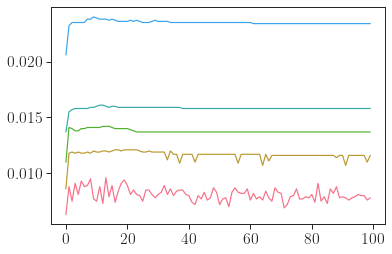

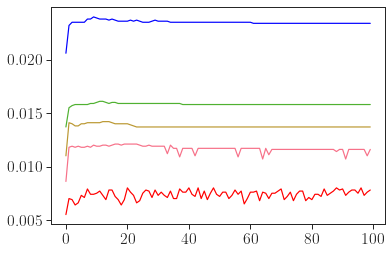

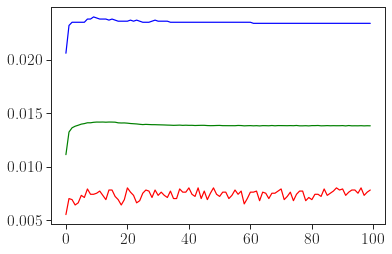

MLP_very_small_less_epochs 0.0272000003606081 5.576000073924661


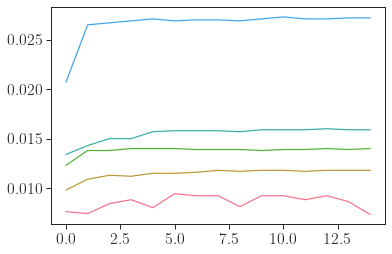

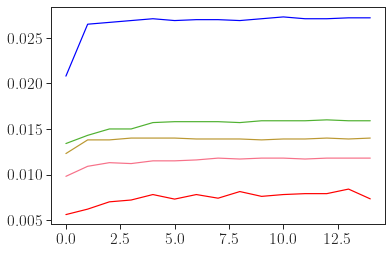

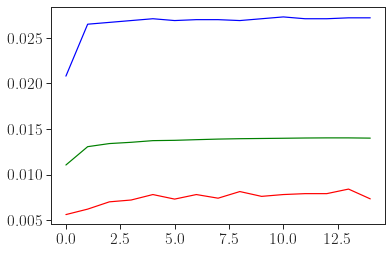

MLP_small 0.0236000008881092 4.838000182062386


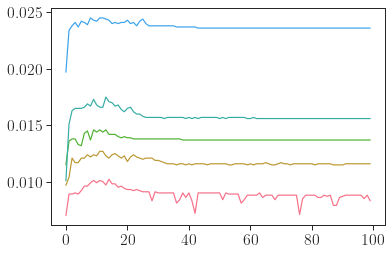

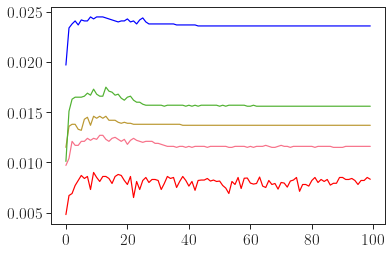

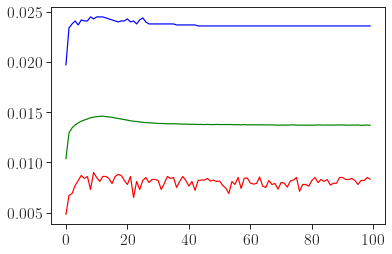

MLP_decreasing_dyn 0.0245999991893768 5.042999833822244


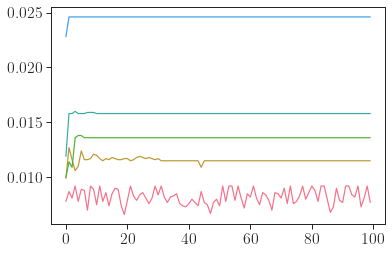

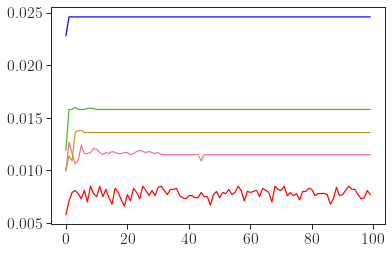

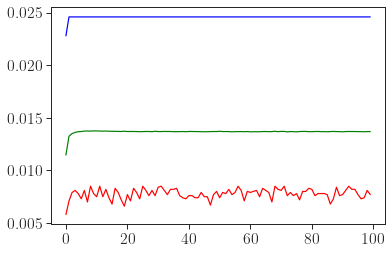

MLP_deeper_dyn 0.0273000001907348 5.5965000391006345


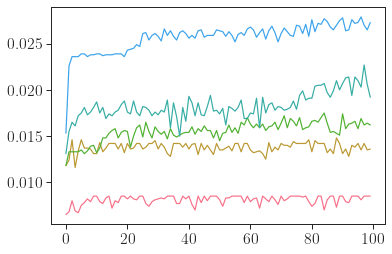

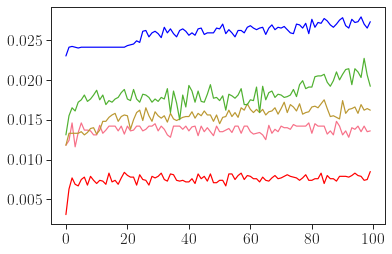

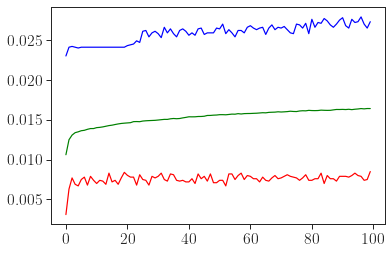

LSTM_small 0.0287999995052814 5.903999898582687


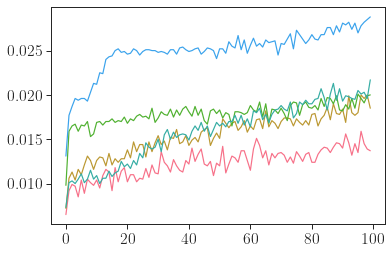

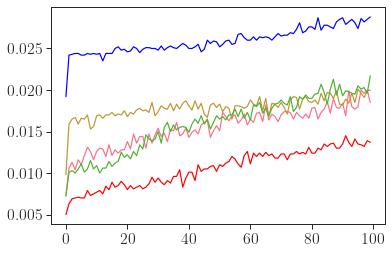

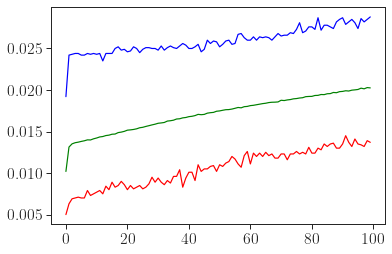

In [85]:
new_consider_experiments = consider_experiments.copy()
all_problems = np.unique(long_problems)
for exp_id in new_consider_experiments:
    very_top = 0

    dfs = []
    for problem in all_problems:
        for dim in dimensions:
            
            name = get_model_name(problem, dim, exp_id)
            if name is None:
                break
            df = pd.read_csv(name)
            dfs.append(df)
            top_accuracy = max(df['accuracy'])
            top_accuracy = np.array(df['accuracy'])[-1]
            #print(np.argmax(df['accuracy']))

            very_top = max(very_top, top_accuracy)
    if very_top == 0:
        continue
    print(exp_id, very_top, very_top/(1/len(encoded_heuristic_space['default.txt'])))


    stats = dict({
        'min': [],
        'max': [],
        'mean': [],
        'median': [],
        '25qrt': [],
        '75qrt': [],
    })
    
    A = []
    for i in range(len(dfs)):
        A.append(len(dfs[i]['accuracy']))
    epochs = min(A)
    
    for i in range(epochs):
        row = [df['accuracy'][tl.listfind(df['epoch'], i)[-1]] for df in dfs]
        stats_row = st.describe(row)
        min_row, max_row = stats_row.minmax
        stats['min'].append(min_row)
        stats['max'].append(max_row)
        stats['mean'].append(stats_row.mean)
        #stats['median'].append(np.median(row))
        #stats['25qrt'].append(np.percentile(row, 25))
        #stats['75qrt'].append(np.percentile(row, 75))
        
        
    # Plot 5 history logs
    last_epoch = epochs-1
    last_row = [(df['accuracy'][tl.listfind(df['epoch'], last_epoch)[-1]], i) for i, df in enumerate(dfs)]
    last_row.sort()
    sz_last_row = len(last_row)
    _, qrt_1 = last_row[0]
    _, qrt_25 = last_row[sz_last_row//4]
    _, qrt_50 = last_row[sz_last_row//2]
    _, qrt_75 = last_row[(3*sz_last_row)//4]
    _, qrt_100 = last_row[-1]
    dfs_filtered = [dfs[qrt_1], dfs[qrt_25], dfs[qrt_50], dfs[qrt_75], dfs[qrt_100]]
    for df in dfs_filtered:
        epoch = [df['accuracy'][tl.listfind(df['epoch'], i)[-1]]  for i in range(epochs)]
        plt.plot(epoch)

    
            
    if is_saving:
        plt.savefig(folder_name + results_file_name + '_' + exp_id + '_ML_learning_rate_5examples.' + saving_format,
                format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
    if show_plots:
        plt.show()
    
    # Plot 3 history logs + min/max
    
    plt.plot(stats['min'], color='red')
    plt.plot(stats['max'], color='blue')
    for df in dfs_filtered[1:-1]:
        epoch = [df['accuracy'][tl.listfind(df['epoch'], i)[-1]]  for i in range(epochs)]
        plt.plot(epoch)
            
            
    if is_saving:
        plt.savefig(folder_name + results_file_name + '_' + exp_id + '_ML_learning_rate_3examples.' + saving_format,
                format=saving_format, dpi=333, bbox_inches="tight", transparent=True)
    if show_plots:
        plt.show()
    
    # Plot min/avg/max
    plt.plot(stats['min'], color='red')
    plt.plot(stats['max'], color='blue')
    plt.plot(stats['mean'], color='green')
    
    #plt.plot(stats['median'], color='yellow')
    #plt.plot(stats['25qrt'], color='black')
    #plt.plot(stats['75qrt'], color='purple')
    
    #plt.xticks([])
    if show_plots:
        plt.show()


### Print single benchmark function learning 

99


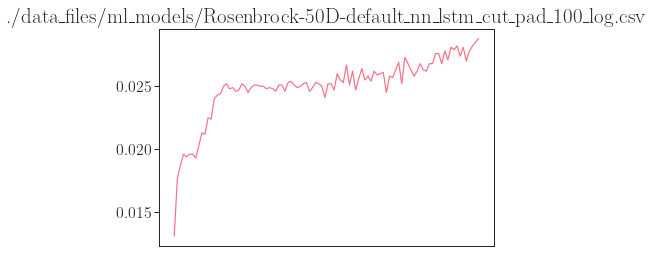

In [86]:
for problem in all_problems:
    for dim in dimensions:
        
        name = get_model_name(problem, dim, exp_id)
        if name is None:
            break
        df = pd.read_csv(name)

        top_accuracy = max(df['accuracy'])
        
        top_accuracy = np.array(df['accuracy'])[-1]
        if top_accuracy != very_top:
            continue
        print(np.argmax(df['accuracy']))
        fig, ax = plt.subplots(figsize=(6,4))
        plt.title(name)
        plt.plot(df['accuracy'])
        #barplottt = sns.barplot(x=df['epoch'], y=df['accuracy'], palette='tab20')
        plt.xticks([])
        plt.show()  